# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [44]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers


### Ejemplo de uso

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
# Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

# esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()


,x0,x1,x2,x3,x4,target
0,-1.850494,-0.886131,0.990909,0.592332,0.407306,-153.719731
1,-0.362388,-0.620171,0.032231,-0.448512,0.528112,-41.642063
2,0.037130,-0.971156,0.634941,1.254279,1.321034,-22.464210
3,0.673421,0.687080,-1.161214,-0.671336,-0.168345,65.360123
4,0.592574,-0.600341,-0.306962,0.559613,0.137109,26.384580


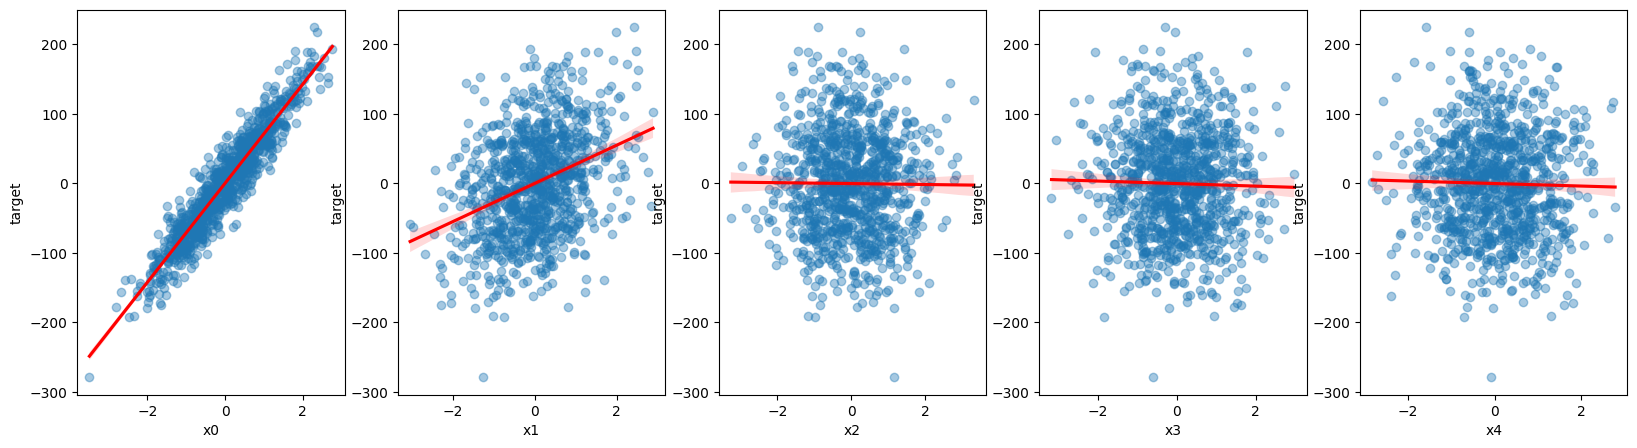

In [47]:
# vamos a visualizar estas variables
# creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)


Ahora agregamos _outliers_ a un nuevo dataset

In [48]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [49]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)


Text(0.5, 1.0, 'Outliers (one-tailed)')

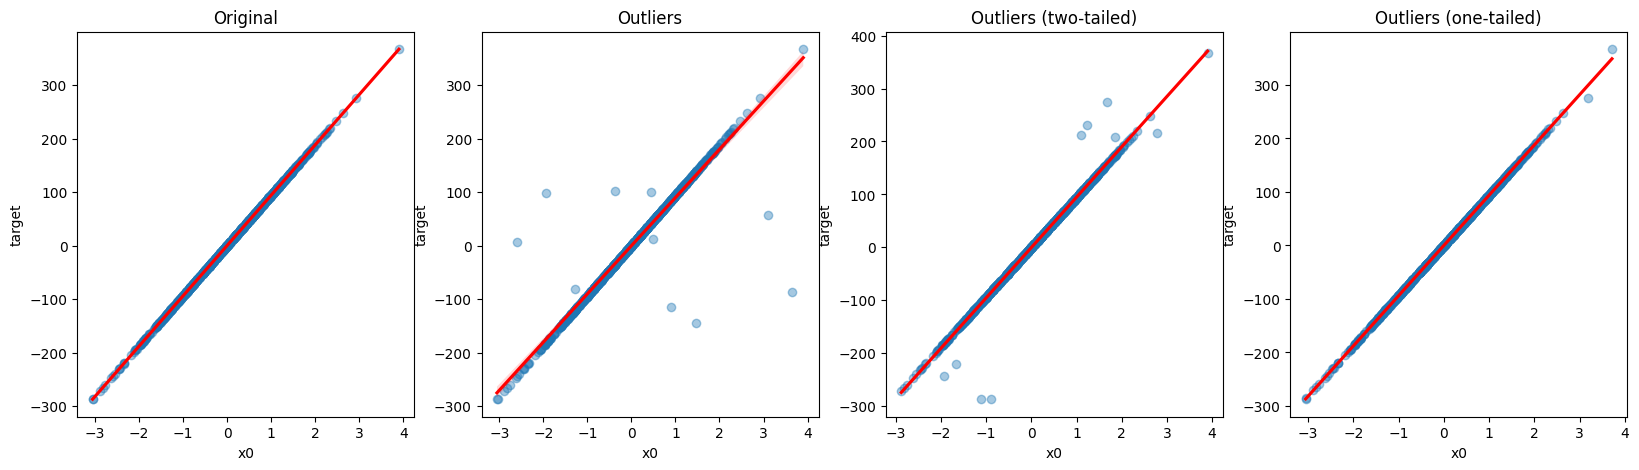

In [50]:
# vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

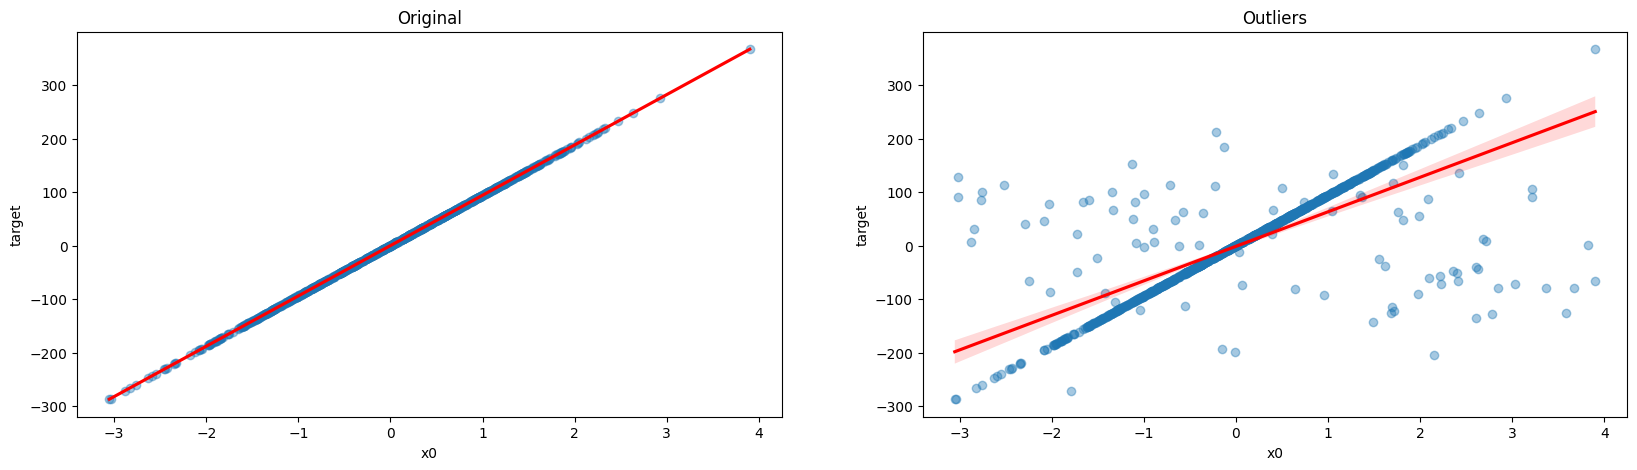

In [51]:
# y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

# vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [52]:
import numpy as np
from tqdm import tqdm


In [53]:
# Parámetros de la simulación
n_exp = 1
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1

noise = np.linspace(0, 100, 100)
bias = np.linspace(0, 100, 20)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
train_rmse = []
test_rmse = []
train_mae = []
test_mae = []
coef = []
# Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
            X_train, X_test, y_train, y_test = train_test_split(
                data.iloc[:, :-1], data['target'], test_size=0.3)

            model = LinearRegression()
            model.fit(X_train, y_train)

            coef.append(model.coef_)

            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            train_rmse.append(
                np.sqrt(mean_squared_error(y_train_pred, y_train)))
            test_rmse.append(np.sqrt(mean_squared_error(y_test_pred, y_test)))
            train_mae.append(mean_absolute_error(y_train_pred, y_train))
            test_mae.append(mean_absolute_error(y_test_pred, y_test))


100%|██████████| 1/1 [00:09<00:00,  9.34s/it]


0.006075481105810864
49.69150380063646


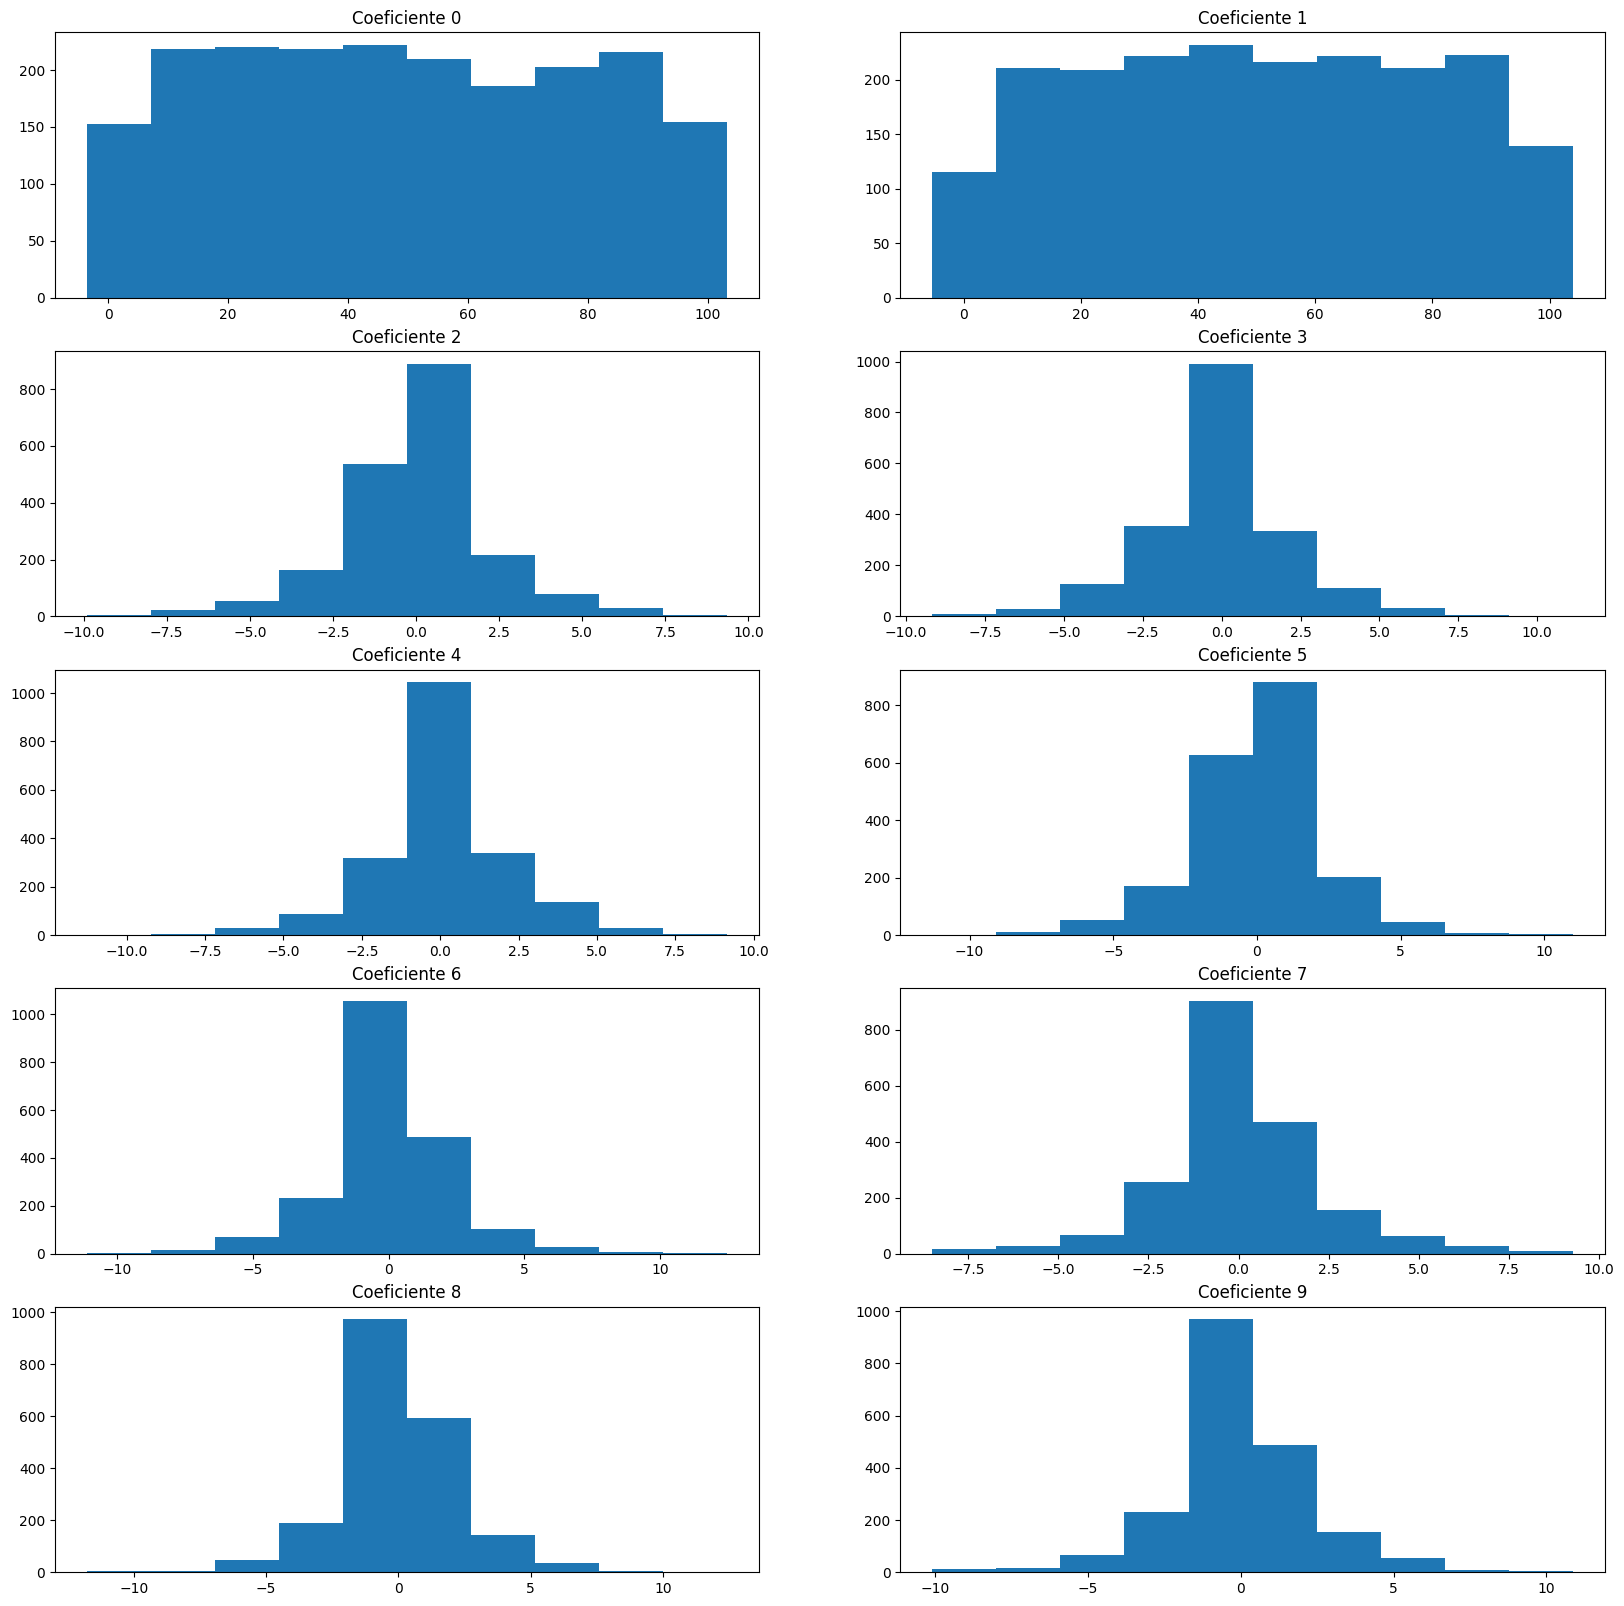

In [55]:
import matplotlib.pyplot as plt

coefficients = np.array(coef)
coef_inf = coefficients[:, :n_informative].flatten()
coef_n_inf = coefficients[:, n_informative:].flatten()
print(np.average(coef_n_inf))
# Mientras que la media de los coeficientes no informativos es muy cercano a 0, que seria lo esperado
print(np.average(coef_inf))
# El caso no es el mismo para los informativos
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i in range(n_features):
    axs[i].hist(coefficients[:, i])
    axs[i].set_title(f"Coeficiente {i}")


### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

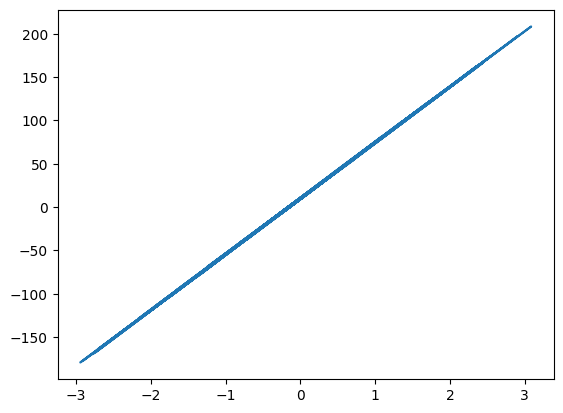

In [56]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

# Generamos dataset con 1000 datos y solo un poco de ruido, y un bias 0.
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0.5,
    bias=10,
    output='dataframe'
)
plt.plot(data['x0'], data['target'])
percentage_extreme_outliers = np.linspace(0.01, 0.1, 10)
data_with_outliers = []
for i in range(len(percentage_extreme_outliers)):
    data_with_outliers.append(generate_outliers(
        df=data,
        columns=['x0'],
        percentage=percentage_extreme_outliers[i],
        extreme_outliers=True))


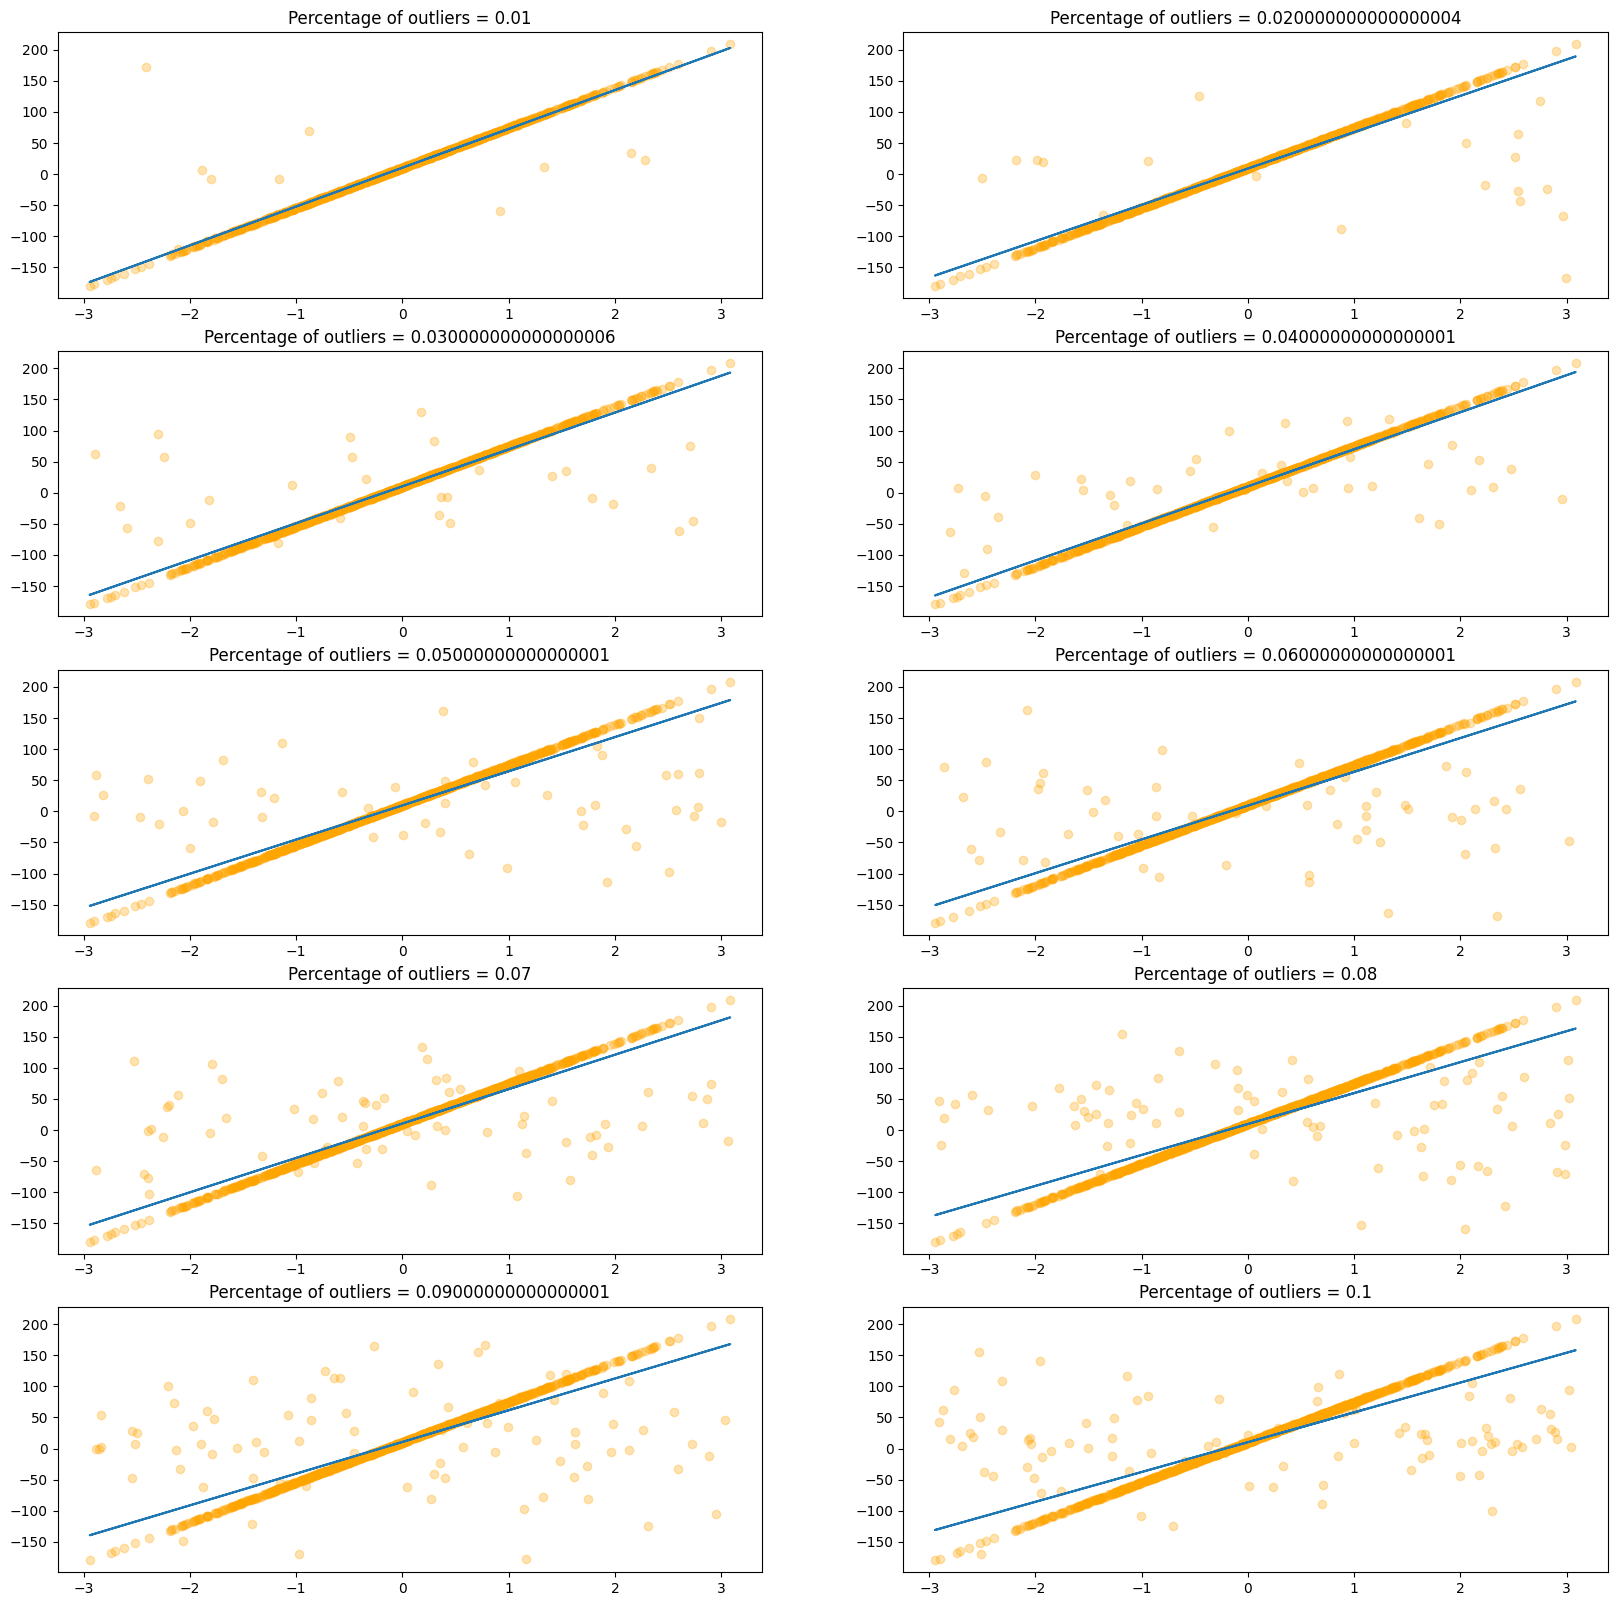

In [57]:
# LinealRegression.
lineal_rmse = []
lineal_mae = []
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i,percentage in enumerate(percentage_extreme_outliers):
    model = LinearRegression(fit_intercept=True)
    x = np.array(data_with_outliers[i]['x0']).reshape(-1, 1)
    y = np.array(data_with_outliers[i]['target']).reshape(-1, 1)
    model.fit(x, y)
    lineal_mae.append(mean_absolute_error(model.predict(x), y))
    lineal_rmse.append(np.sqrt(mean_squared_error(model.predict(x), y)))
    axs[i].plot(x, model.predict(x))
    axs[i].scatter(x, y, c='orange', alpha=0.3)
    axs[i].set_title('Percentage of outliers = ' + str(percentage))


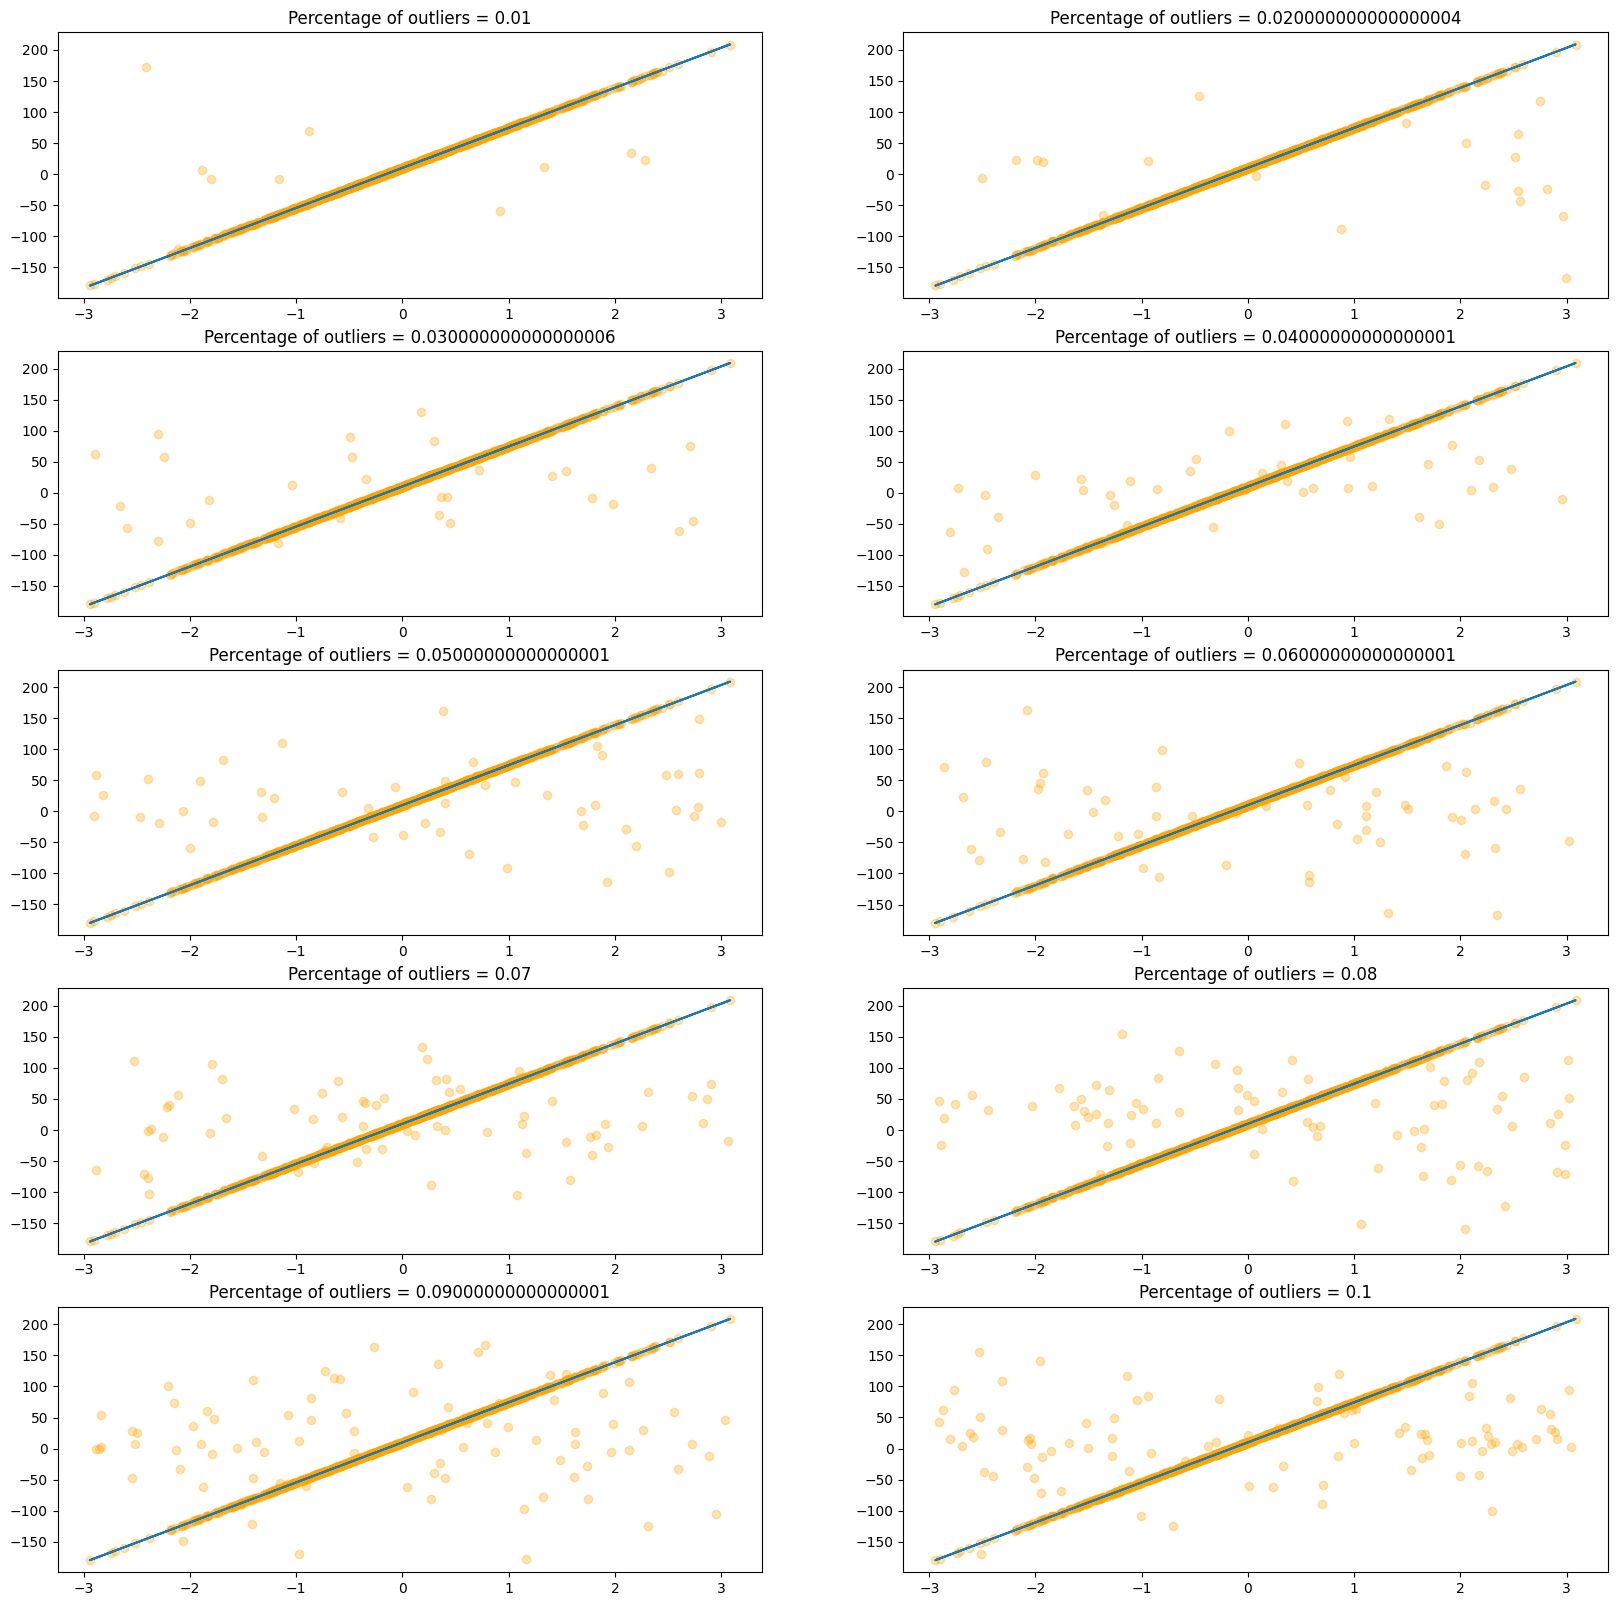

In [58]:
# HuberRegressor.
hubber_rmse = []
hubber_mae = []
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i,percentage in enumerate(percentage_extreme_outliers):
    model = HuberRegressor(fit_intercept=True)
    x = np.array(data_with_outliers[i]['x0']).reshape(-1, 1)
    y = np.array(data_with_outliers[i]['target'])
    model.fit(x, y)
    hubber_mae.append(mean_absolute_error(model.predict(x), y))
    hubber_rmse.append(np.sqrt(mean_squared_error(model.predict(x), y)))
    axs[i].plot(x, model.predict(x))
    axs[i].scatter(x, y, c='orange', alpha=0.3)
    axs[i].set_title('Percentage of outliers = ' + str(percentage))


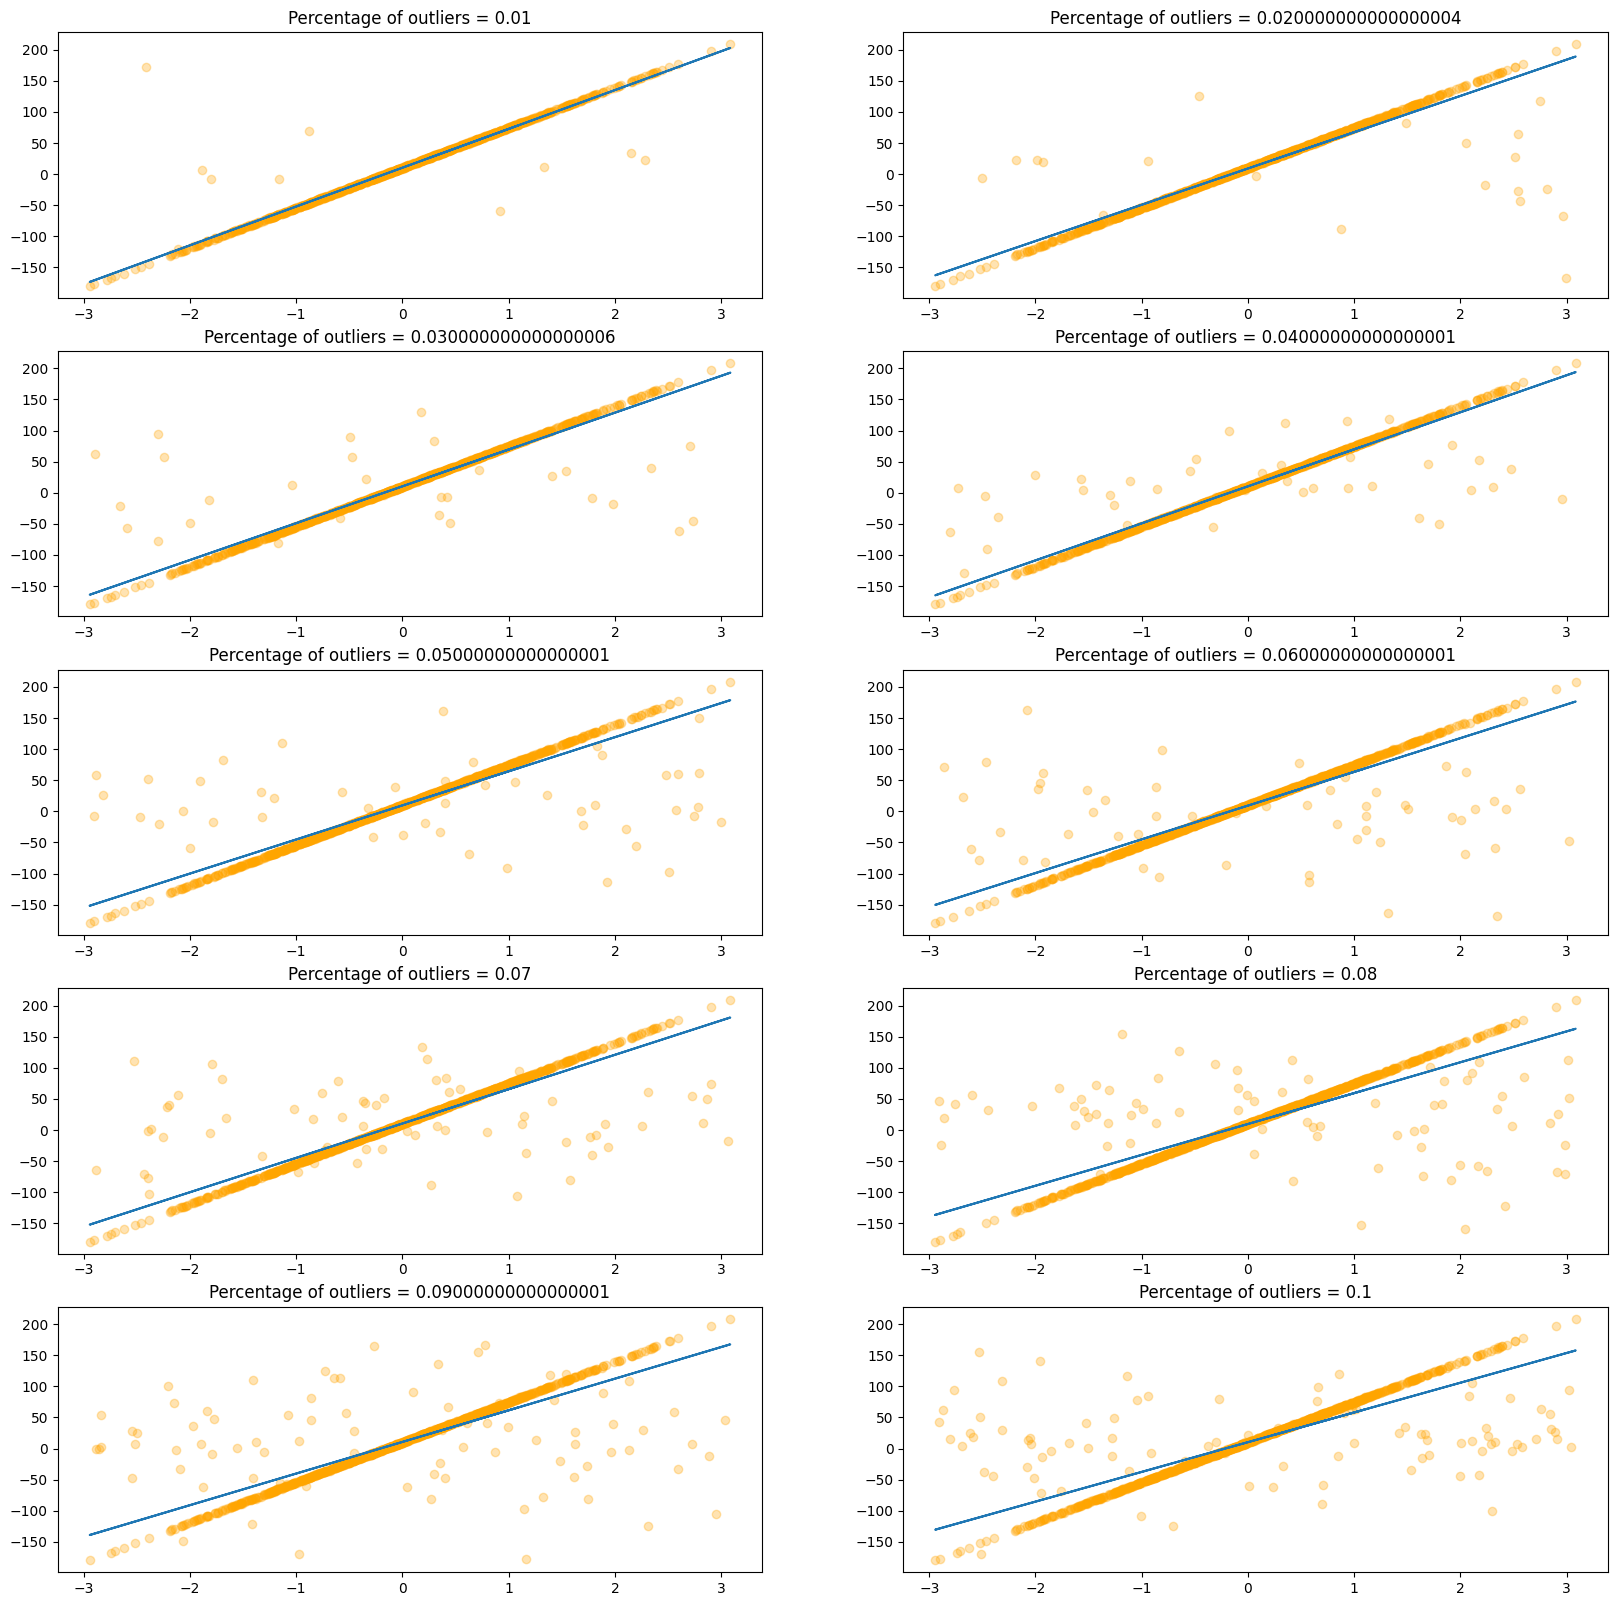

In [59]:
# RidgeCV.
ridge_rmse = []
ridge_mae = []
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i,percentage in enumerate(percentage_extreme_outliers):
    model = RidgeCV(alphas=np.logspace(-100, 100, 2000),
                    fit_intercept=True)
    x = np.array(data_with_outliers[i]['x0']).reshape(-1, 1)
    y = np.array(data_with_outliers[i]['target']).reshape(-1, 1)
    model.fit(x, y)
    ridge_mae.append(mean_absolute_error(model.predict(x), y))
    ridge_rmse.append(np.sqrt(mean_squared_error(model.predict(x), y)))
    axs[i].plot(x, model.predict(x))
    axs[i].scatter(x, y, c='orange', alpha=0.3)
    axs[i].set_title('Percentage of outliers = ' + str(percentage))


Text(0, 0.5, 'Raiz del error cuadratico medio')

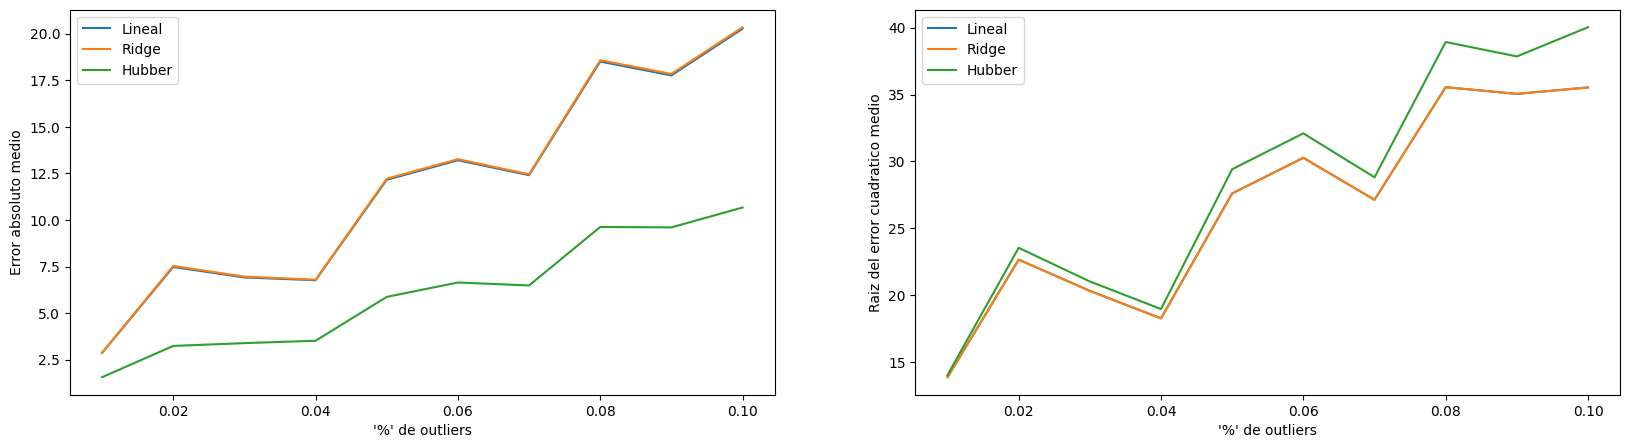

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(percentage_extreme_outliers, lineal_mae, label='Lineal')
axs[0].plot(percentage_extreme_outliers, ridge_mae, label='Ridge')
axs[0].plot(percentage_extreme_outliers, hubber_mae, label='Hubber')
axs[0].legend()
axs[0].set_xlabel("'%' de outliers")
axs[0].set_ylabel("Error absoluto medio")


axs[1].plot(percentage_extreme_outliers, lineal_rmse, label='Lineal')
axs[1].plot(percentage_extreme_outliers, ridge_rmse, label='Ridge')
axs[1].plot(percentage_extreme_outliers, hubber_rmse, label='Hubber')
axs[1].legend()
axs[1].set_xlabel("'%' de outliers")
axs[1].set_ylabel("Raiz del error cuadratico medio")


*Explicacion de los resultados*
La mejor regresion para los casos de mayor cantidad de outliers parece ser la hubber.  Analicemos por que:

LinearRegression:
La implementacion minimiza la suma de las diferencias entre esperado y obtenido, cuadradas. Y en el grafico vemos como verdaderamente el error es mas bajo que la hubber para todos los casos, sin embargo los graficos demostraron, que especialmente en los casos de muchos extreme outliers, la grafica tiende a verse altamente condicionada por los mismos, dado que el error cuadratico es muy alto. Eso le podria quitar poder de generalizacion.

Hubber:
La funcion de loss a minimizar es particular para este metodo. A partir de un punto deja de ser funcion de la diferencia entre valor esperado y obtenido y es una constante. Dicho comportamiento se puede modificar mediante el parametro 'epsilon' en este caso estoy usando el default, y prueba ser robusto. Si bien el RMSE parece mantenerse en niveles mayores que los otros dos metodos, en general, podriamos decir que es el que mejor detecta los outliers y los penaliza. Logra generalizar bien.

RidgeCV:
En este caso la funcion a minimizar es ||y - Xw||^2_2 + alpha * ||w||^2_2, donde el parametro alpha regula que tanto se penaliza a los parametros. En general, podriamos decir que se forma una circunferencia centrada en 0 en el espacio de los coeficientes de la regresion, intentamos quedarnos con la solucion que se mantiene dentro de dicha circunferencia, y que a la vez minimiza el error. En este caso al tener un solo coeficiente importante, no es tan util, dado que se limita acotar el valor maximo y minimo de dicho coeficiente. En general, para los niveles de outliers que manejamos en estos ejemplos se comporta totalmente igual que la regresion lineal sin regularizar.

## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [61]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad



Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

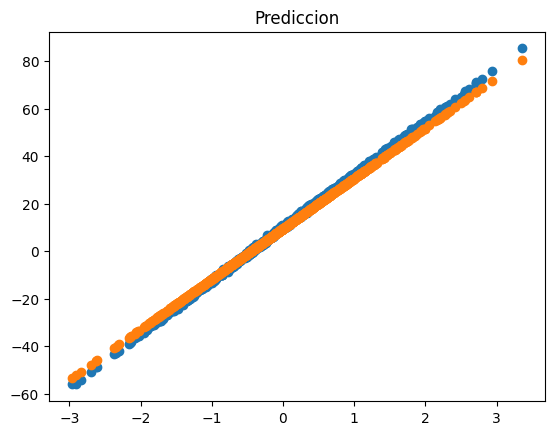

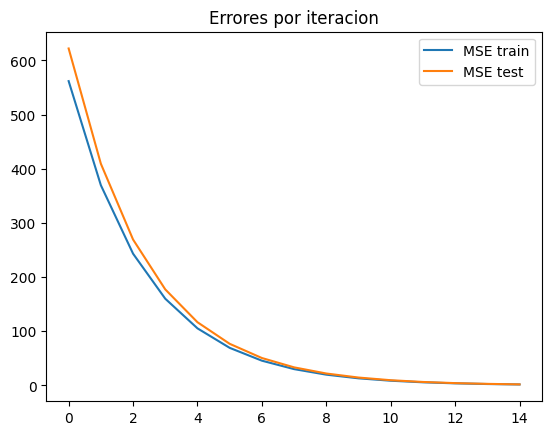

In [62]:
from sklearn.model_selection import train_test_split


def gradientDescent(X: np.ndarray, Y: np.ndarray, theta: np.ndarray, learningRate, epochs, tolerancia):
    mse_errors = []
    test_mse_errors = []
    history = []
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3)
    # as many as X + 1 (bias).
    theta = theta if theta is not None else np.random.rand(X_train.shape[1])
    history = theta.reshape(1, 2)
    for i in range(epochs):
        y_pred = X_train @ theta
        y_pred_test = X_test @ theta
        mse_errors.append(mean_squared_error(y_pred, y_train))
        test_mse_errors.append(mean_squared_error(y_pred_test, y_test))
        if len(test_mse_errors) > 1:
            if (np.abs(mse_errors[-2] - mse_errors[-1]) <= tolerancia):
                return theta, mse_errors, test_mse_errors, history
        theta -= learningRate*gradient(X_train, y_train, theta)
        history = np.concatenate((theta.reshape(1, 2), history), axis=0)

    return theta, mse_errors, test_mse_errors, history


bias = 10
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0.5,
    bias=bias,
    output='dataframe'
)

x = np.insert(np.array(data['x0']).reshape(-1, 1), 0, 1, axis=1)
y = np.array(data['target'])


coef, mse, mse_test, history = gradientDescent(
    x, np.array(data['target']), None, 0.1, 100, 1)
plt.scatter(data['x0'], data['target'])
plt.scatter(data['x0'], x @ coef)
plt.title('Prediccion')
plt.figure(2)
plt.title('Errores por iteracion')
plt.plot(range(len(mse)), mse, label='MSE train')
plt.plot(range(len(mse_test)), mse_test, label='MSE test')
plt.legend()


#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

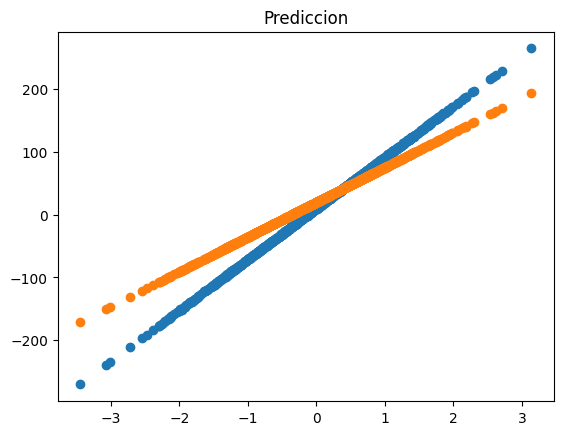

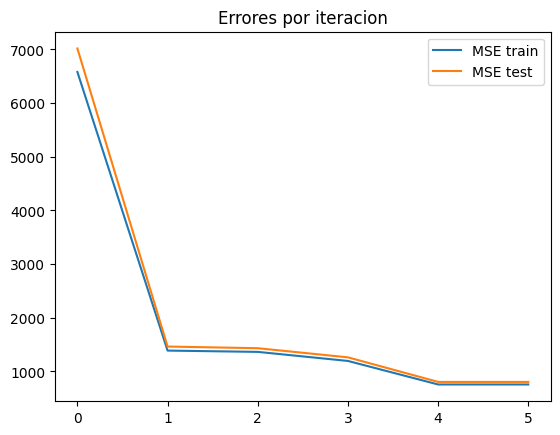

In [63]:
from sklearn.model_selection import train_test_split
import math


def gradientDescentStochastic(X: np.ndarray, Y: np.ndarray, theta: np.ndarray, learningRate, epochs, tolerancia, n_sample):
    mse_errors = []
    test_mse_errors = []
    history = np.array([[]])
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3)
    # as many as X + 1 (bias).
    theta = theta if theta is not None else np.random.rand(X_train.shape[1])
    n_sample = n_sample if n_sample is not None else math.ceil(
        len(X_train) * 0.1)
    for i in range(epochs):
        # shuffle arround the X_train and the y train
        temp = list(zip(X_train, y_train))
        np.random.shuffle(temp)
        X_train, y_train = zip(*temp)
        history = theta.reshape(1, 2)
        for j in range(n_sample):
            y_pred = X_train @ theta
            y_pred_test = X_test @ theta
            mse_errors.append(mean_squared_error(y_pred, y_train))
            test_mse_errors.append(mean_squared_error(y_pred_test, y_test))
            if len(test_mse_errors) > 1:
                if (np.abs(mse_errors[-2] - mse_errors[-1]) <= tolerancia):
                    return theta, mse_errors, test_mse_errors, history
            theta -= learningRate * \
                gradient(np.array([X_train[j]]), np.array([y_train[j]]), theta)
            history = np.concatenate((theta.reshape(1, 2), history), axis=0)

    return theta, mse_errors, test_mse_errors, history


bias = 10
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0.5,
    bias=bias,
    output='dataframe'
)

x = np.insert(np.array(data['x0']).reshape(-1, 1), 0, 1, axis=1)
y = np.array(data['target'])


coef, mse, mse_test, history = gradientDescentStochastic(
    x, y, None, 0.1, 100, 0.01, None)
plt.scatter(data['x0'], data['target'])
plt.scatter(data['x0'], x @ coef)
plt.title('Prediccion')
plt.figure(2)
plt.title('Errores por iteracion')
plt.plot(range(len(mse)), mse, label='MSE train')
plt.plot(range(len(mse_test)), mse_test, label='MSE test')
plt.legend()



Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

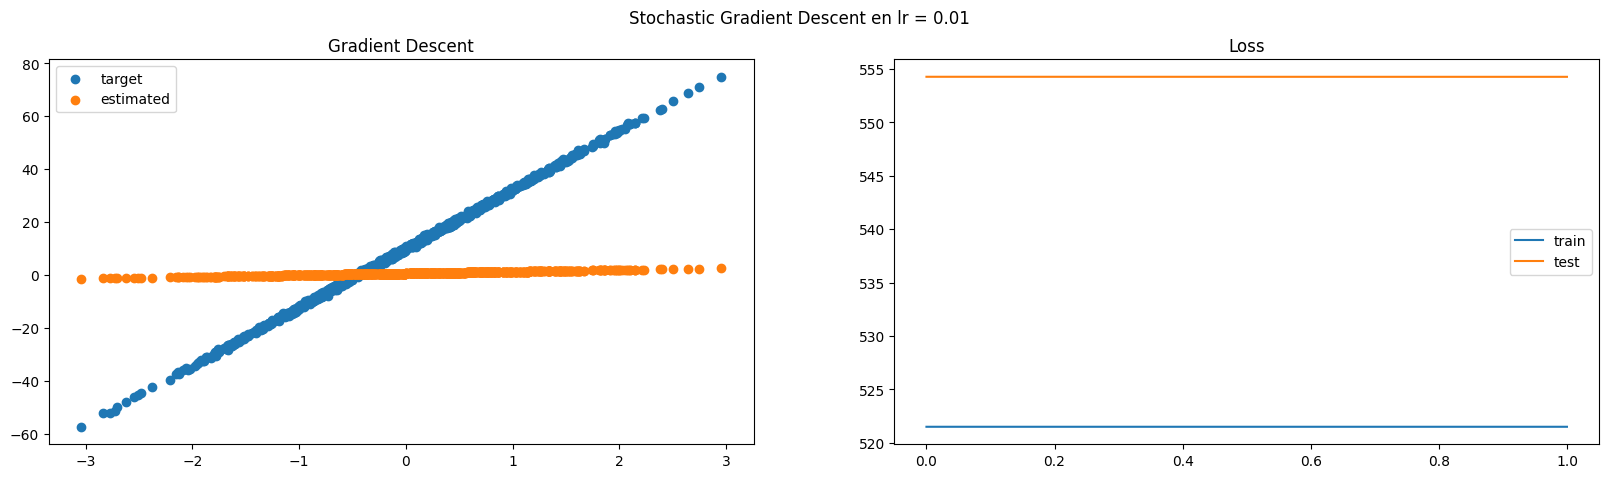

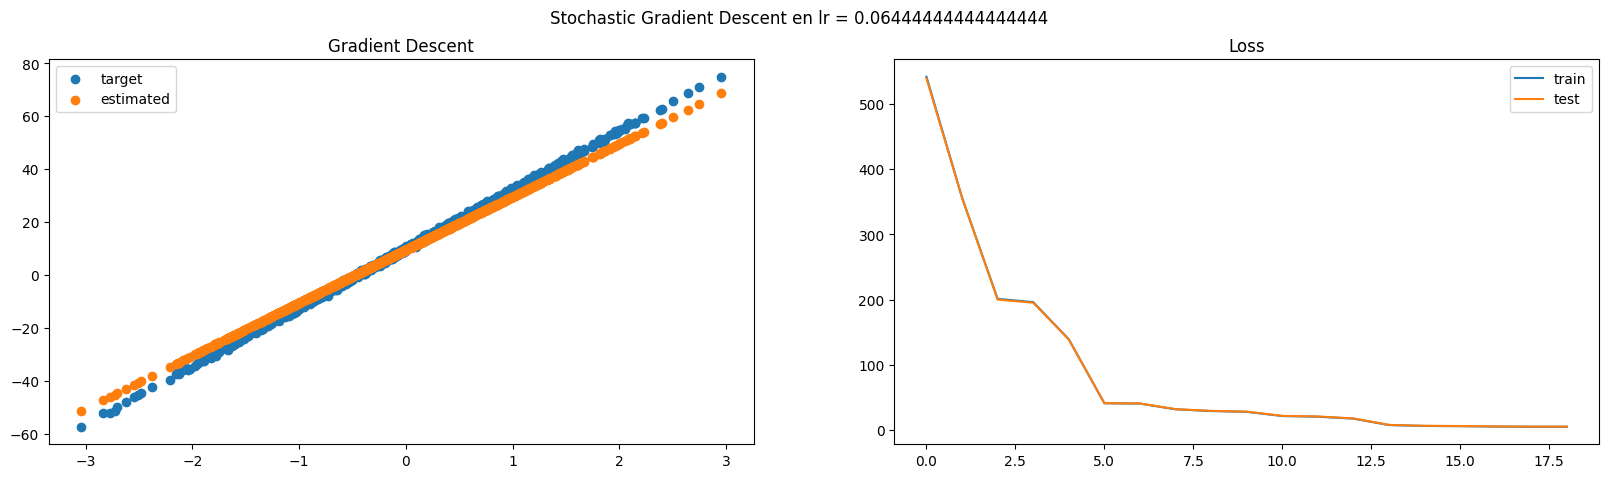

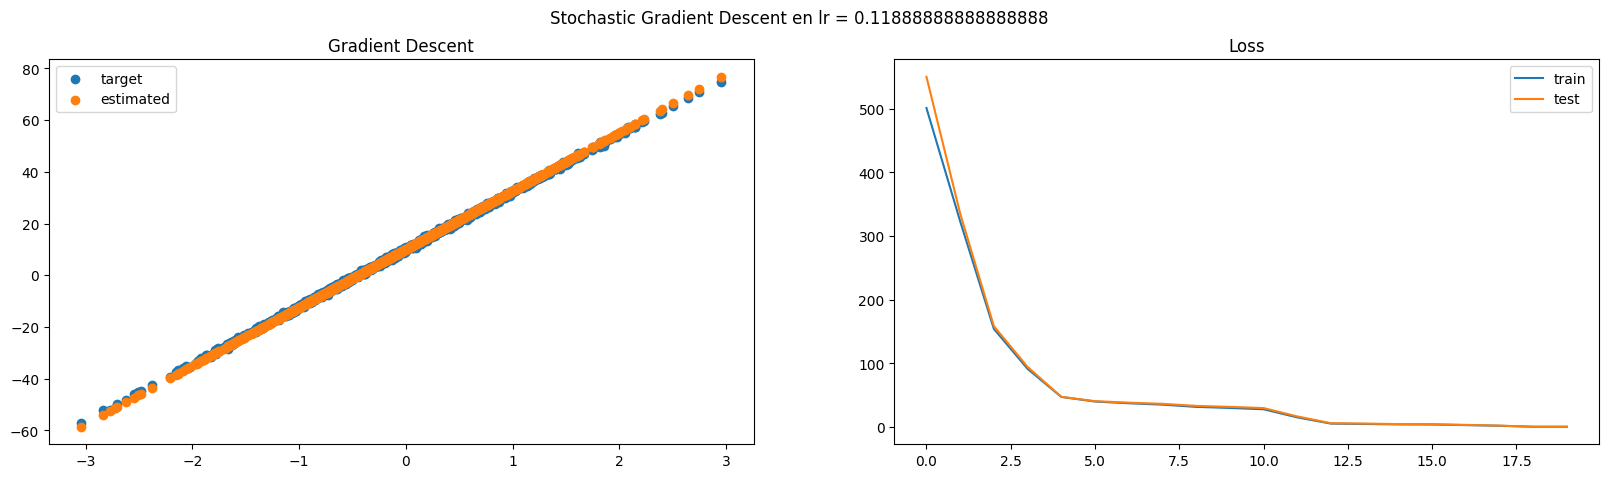

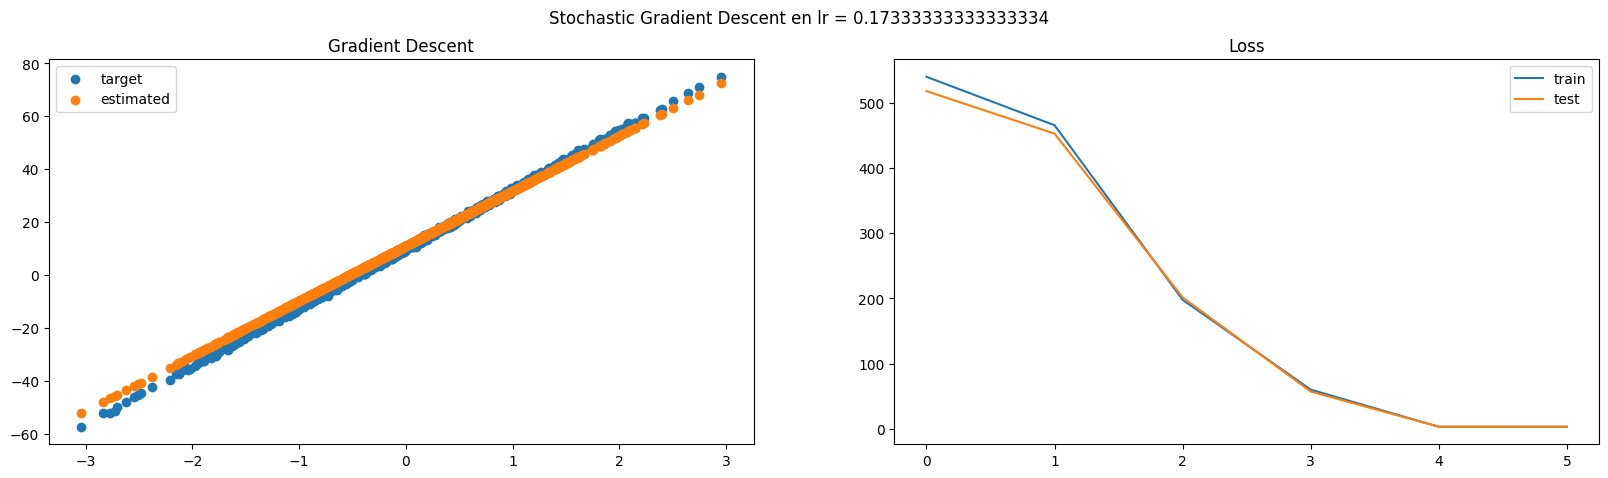

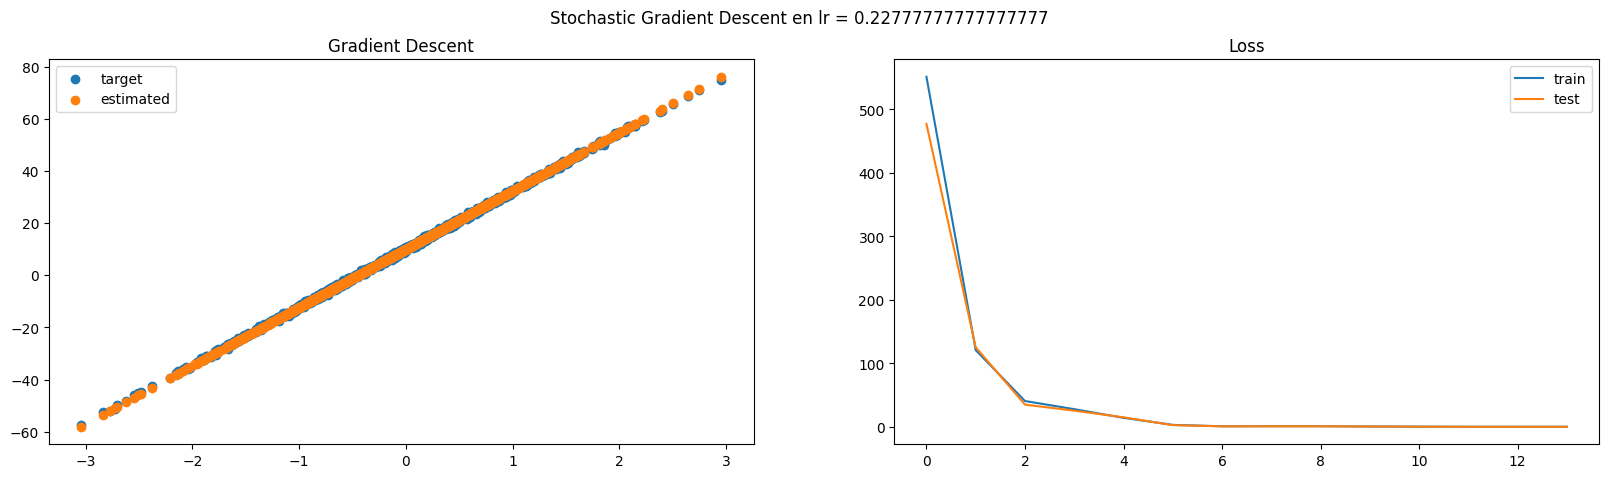

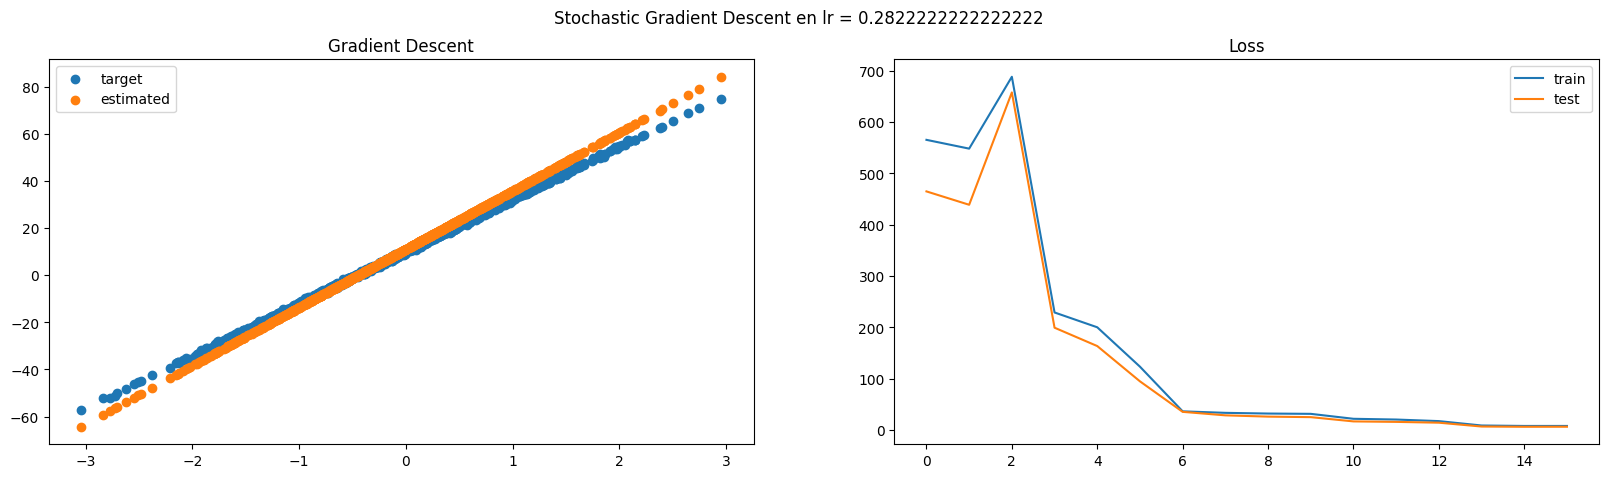

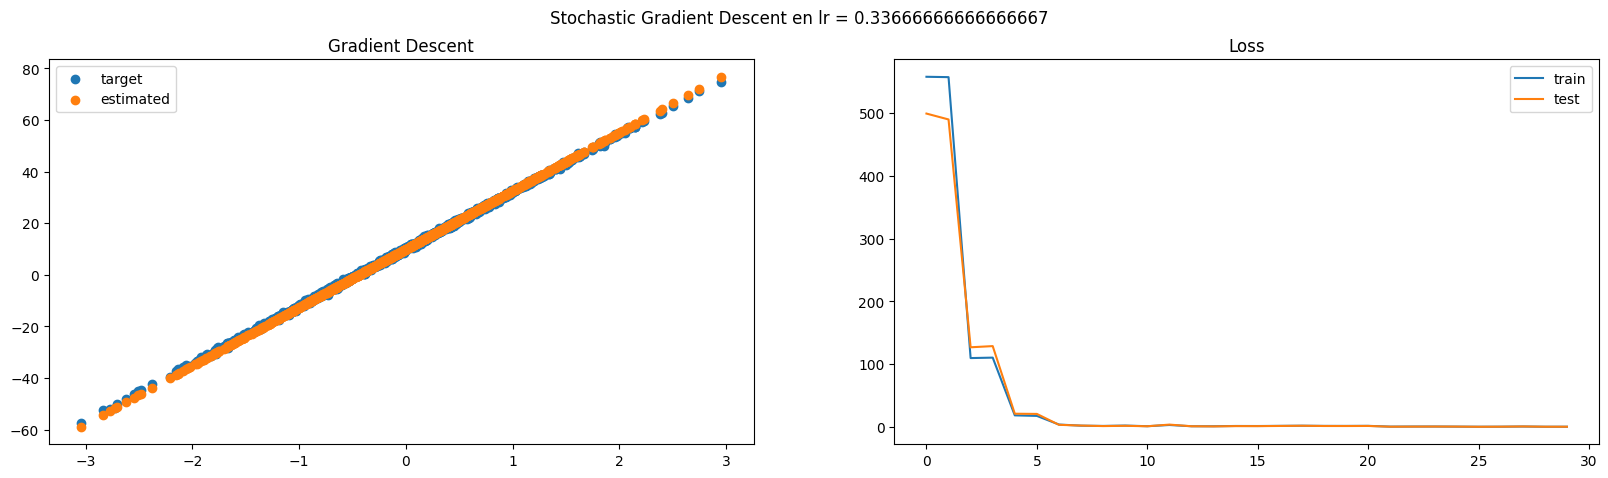

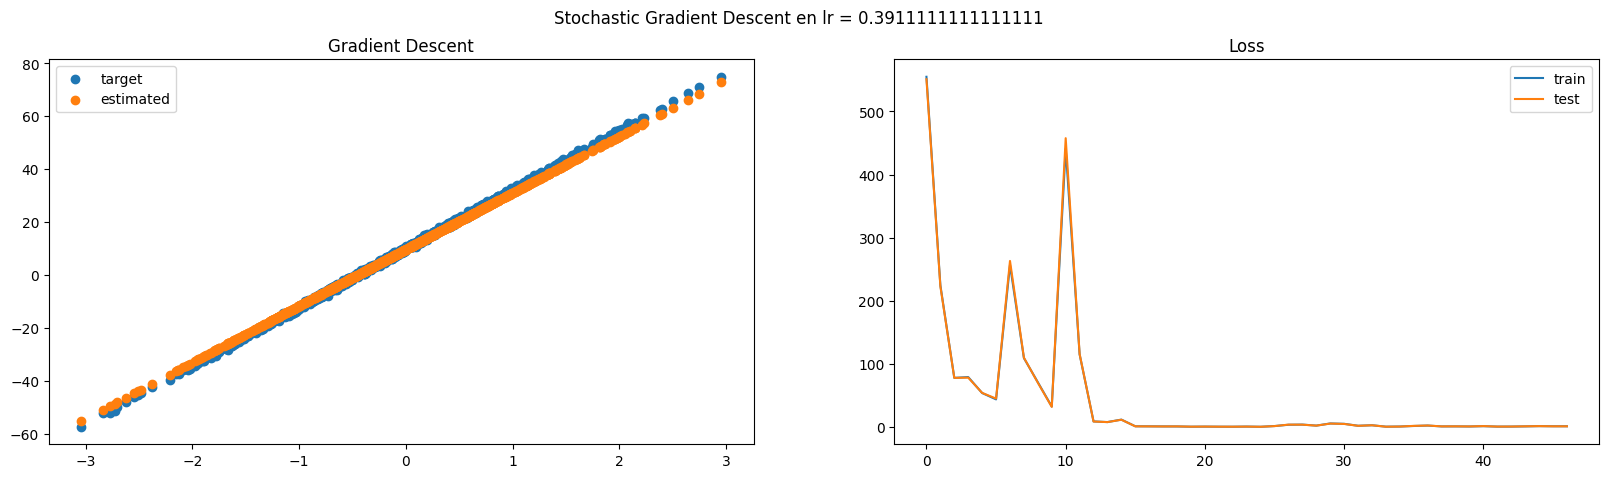

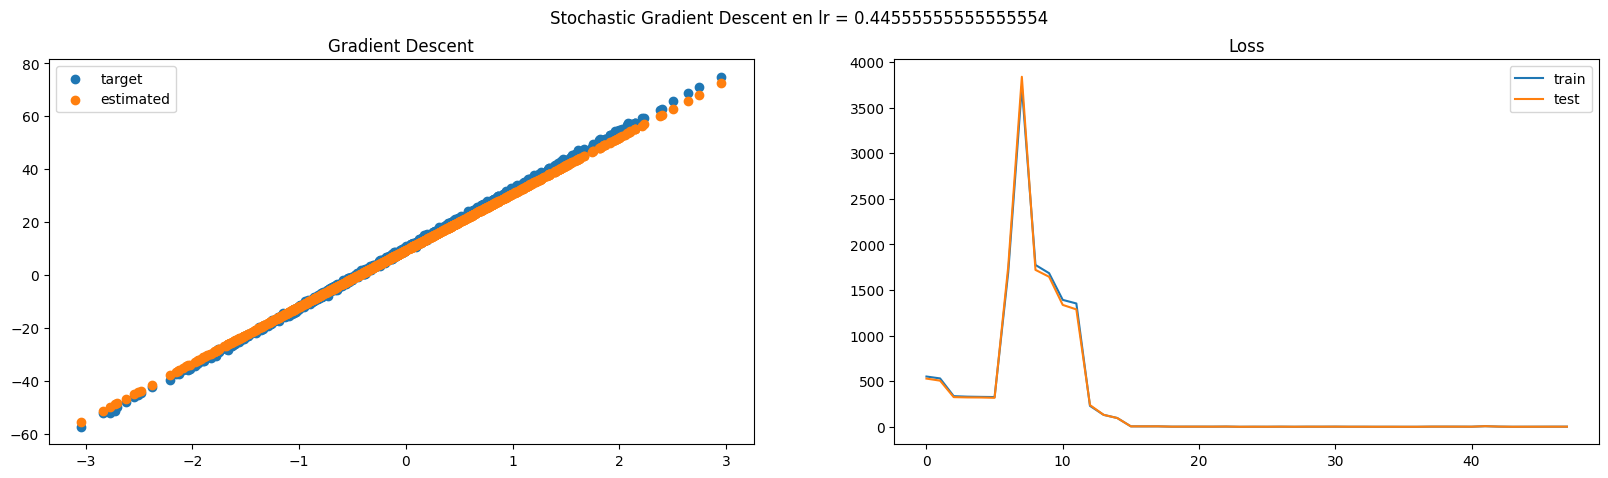

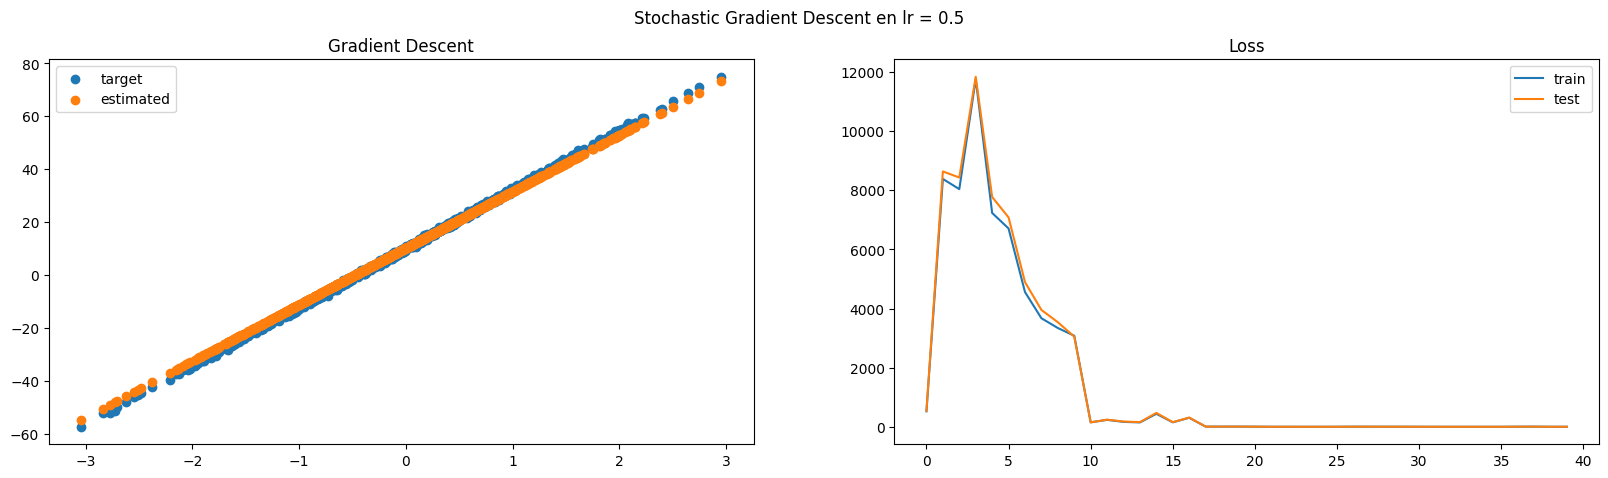

In [64]:
# La diferencia es clara en los graficos, mientras que la perdida dismiuye mucho mas suave en el GD y de manera monotona, en el SGD es mas ruidoso.
# Se puede observar bien en las simulaciones a contiuacion

bias = 10
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0.5,
    bias=bias,
    output='dataframe'
)

x = np.insert(np.array(data['x0']).reshape(-1, 1), 0, 1, axis=1)
y = np.array(data['target'])
lr = np.linspace(0.01, 0.5, 10)

for i in lr:
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    axs = axs.flatten()
    coef, rmse, rmse_test, history = gradientDescentStochastic(
        x, y, None, i, 10, 0.01, 50)
    axs[0].scatter(data['x0'], data['target'], label='target')
    axs[0].scatter(data['x0'], x @ coef, label='estimated')
    axs[0].set_title('Gradient Descent')
    axs[0].legend()
    axs[1].plot(range(len(rmse)), rmse, label='train')
    axs[1].plot(range(len(rmse_test)), rmse_test, label='test')
    axs[1].set_title('Loss')
    axs[1].legend()
    fig.suptitle('Stochastic Gradient Descent en lr = ' + str(i))


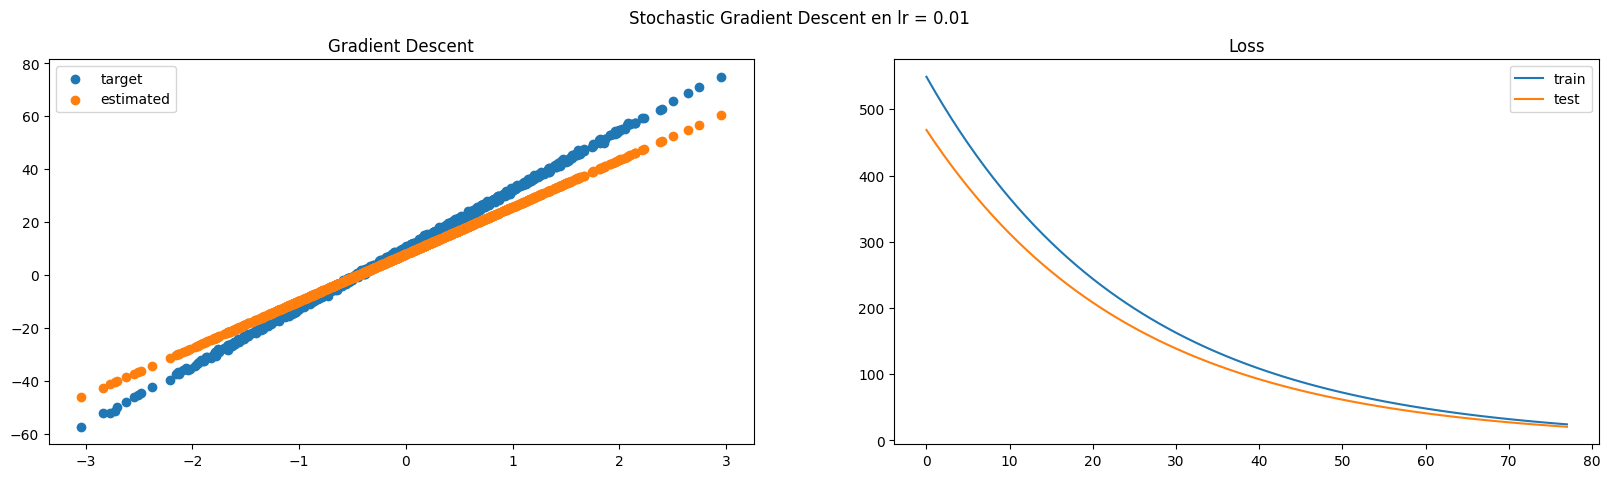

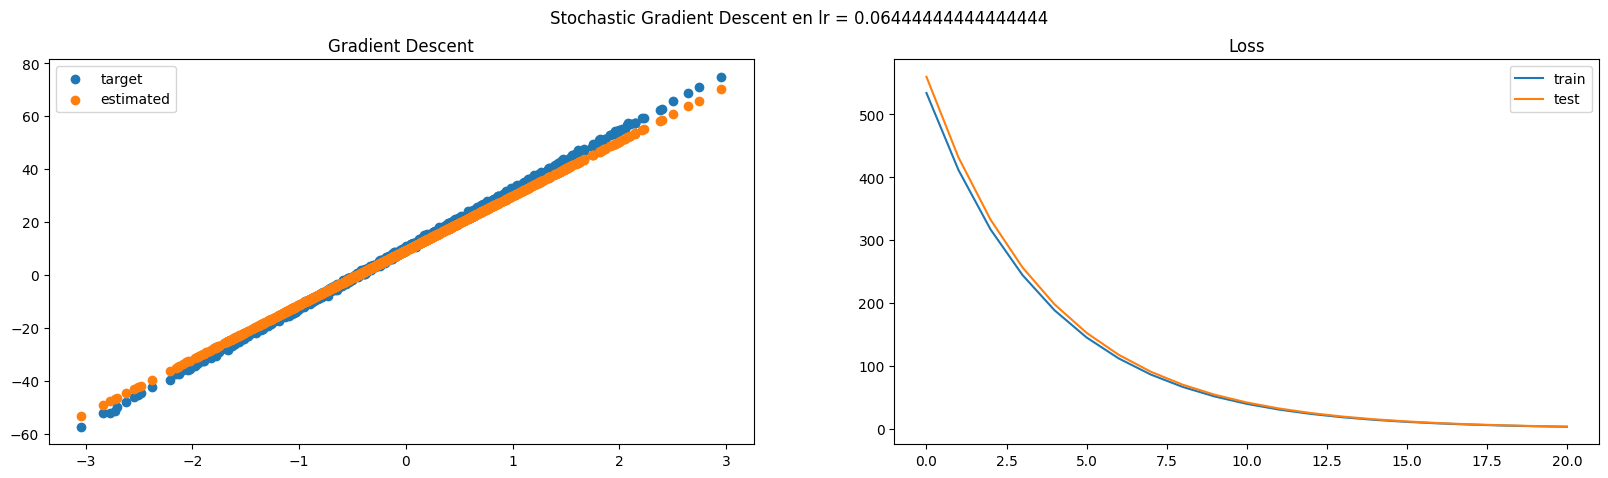

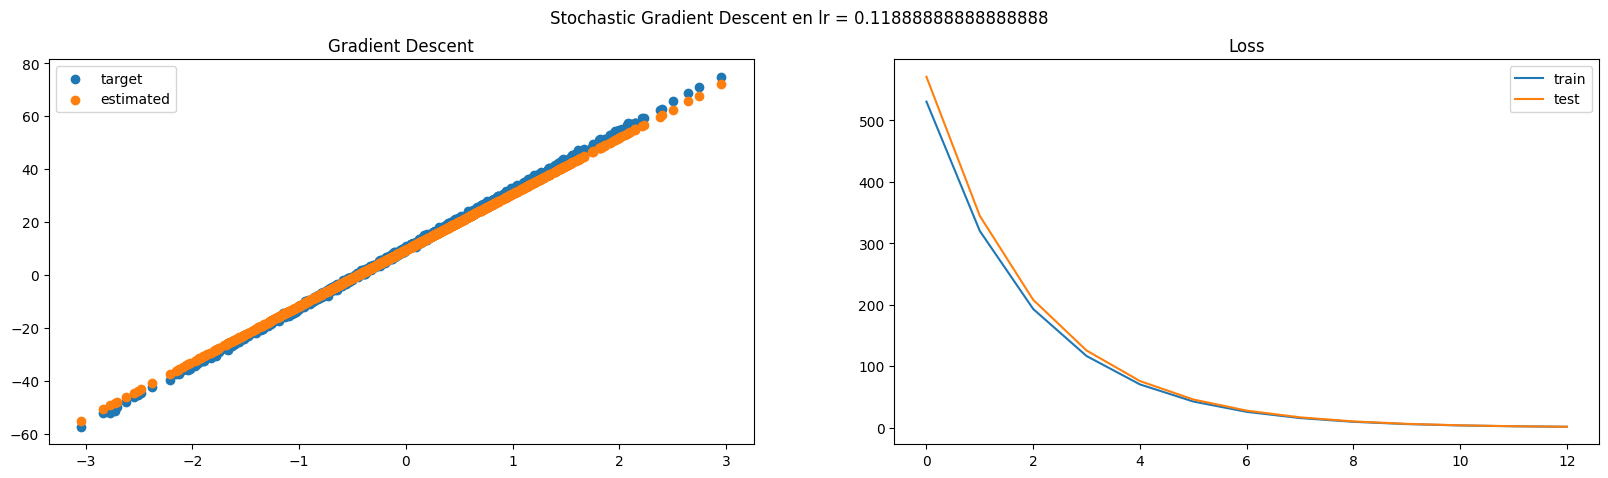

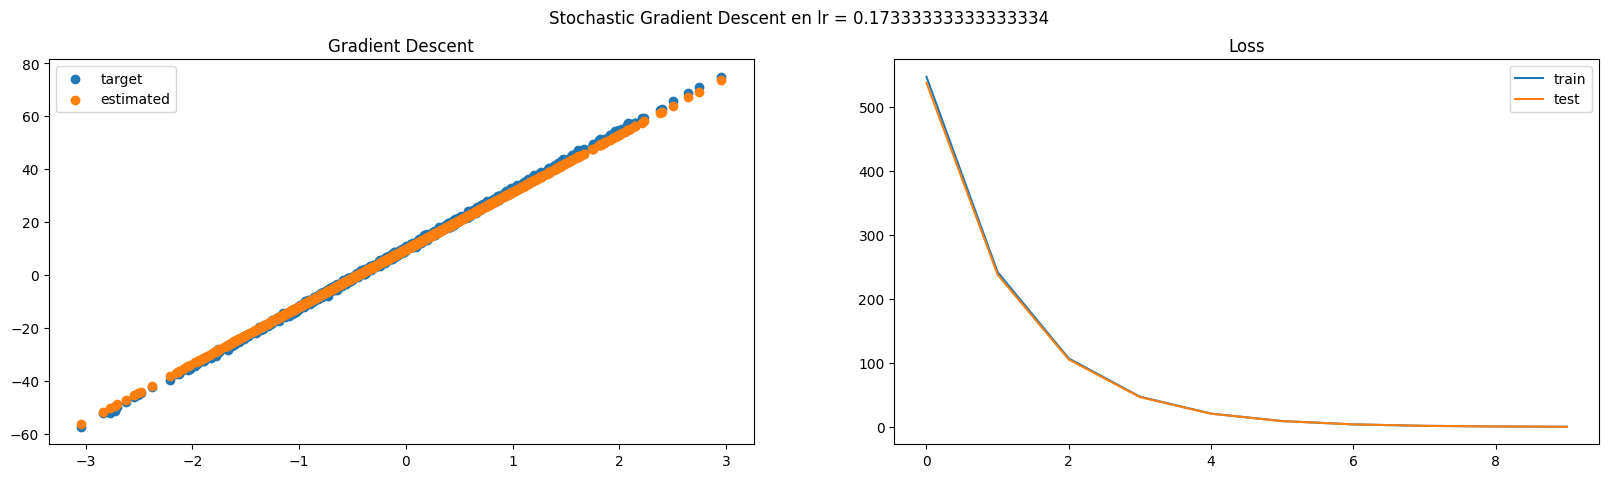

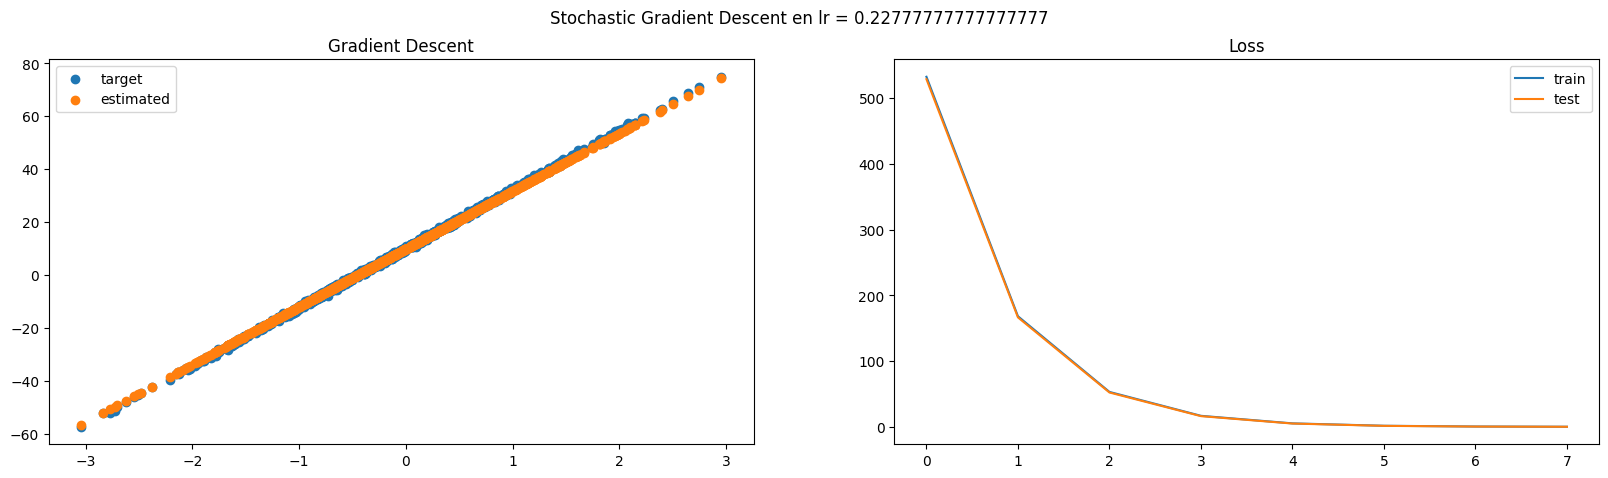

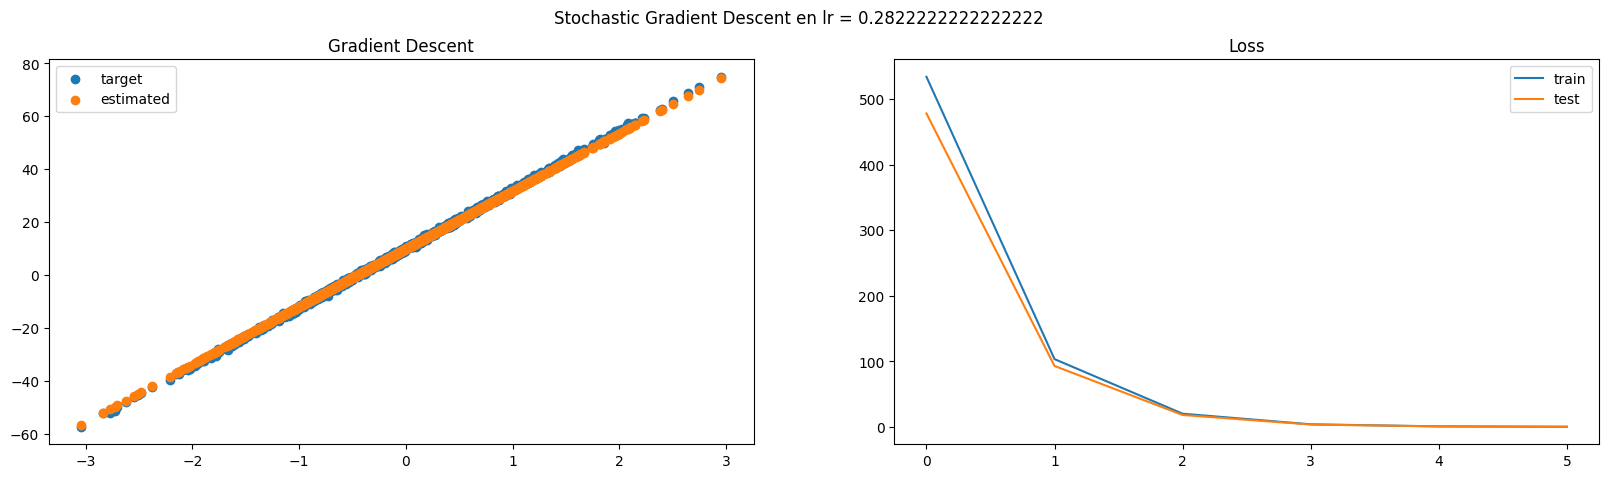

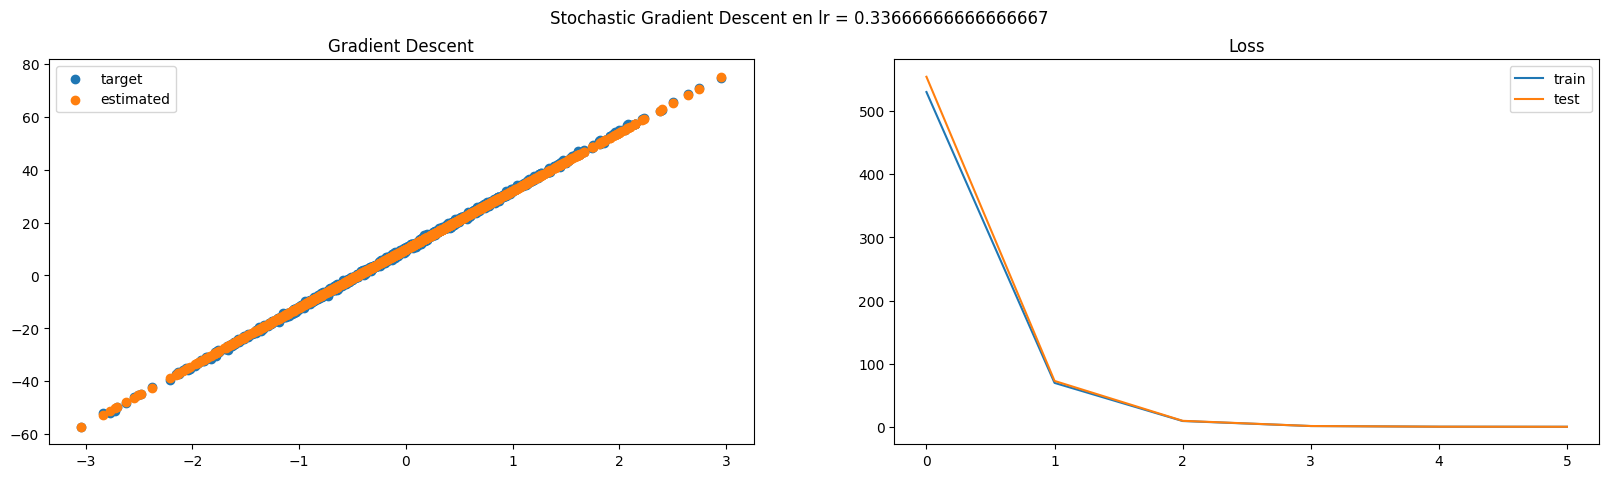

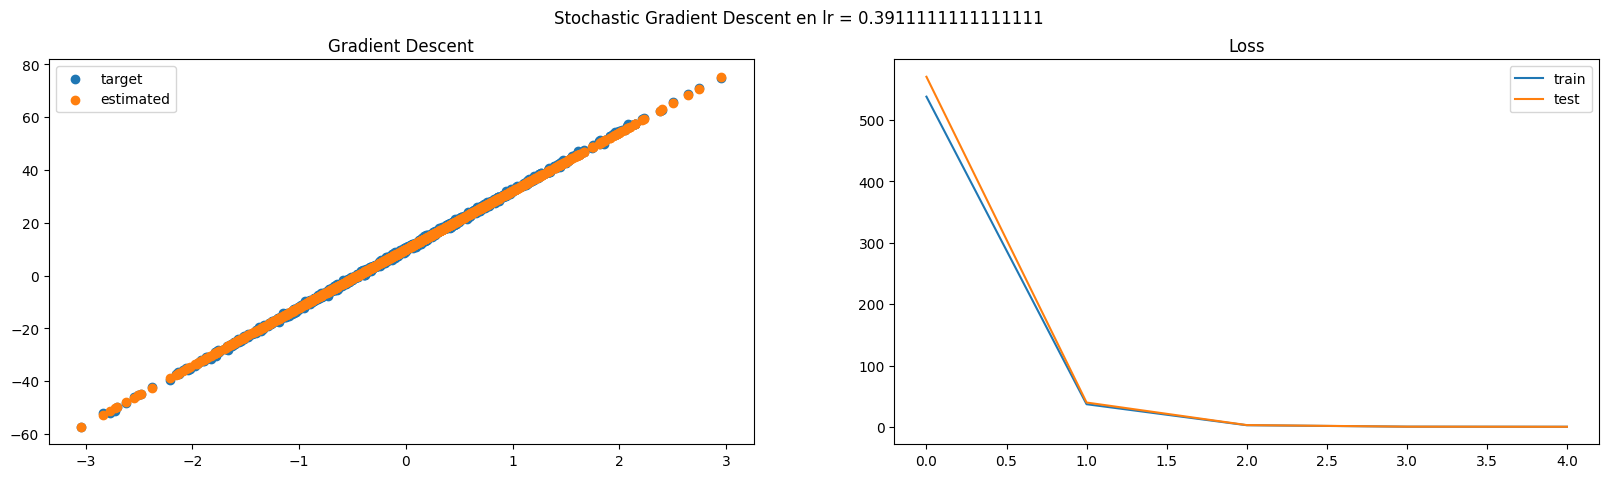

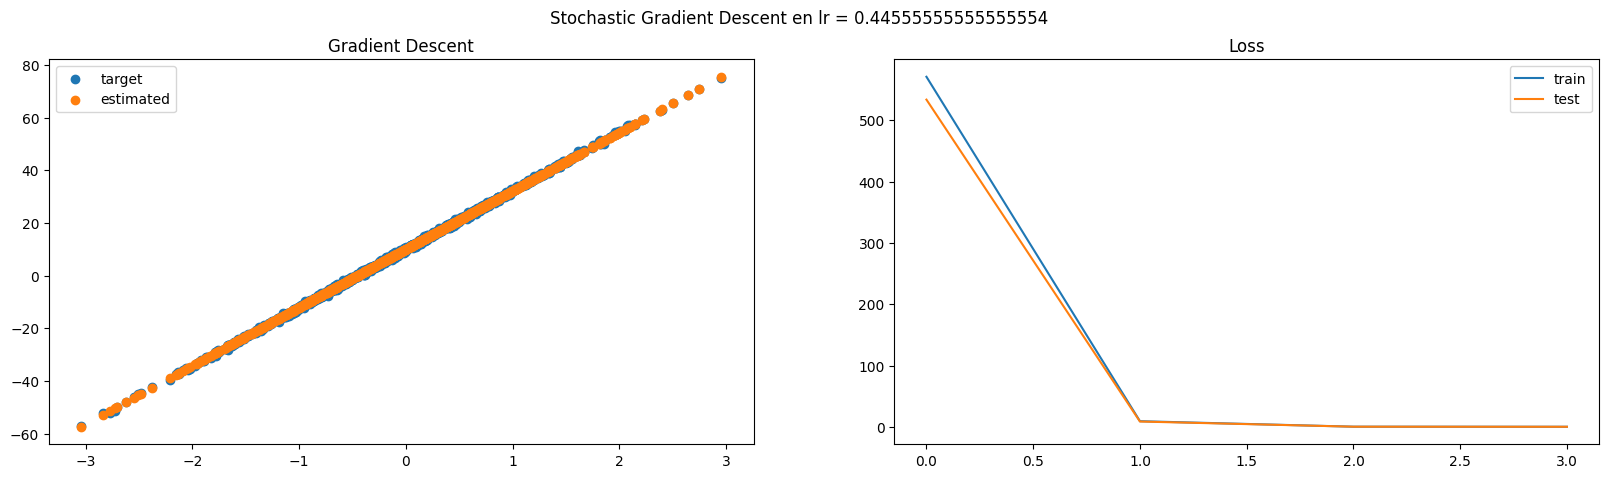

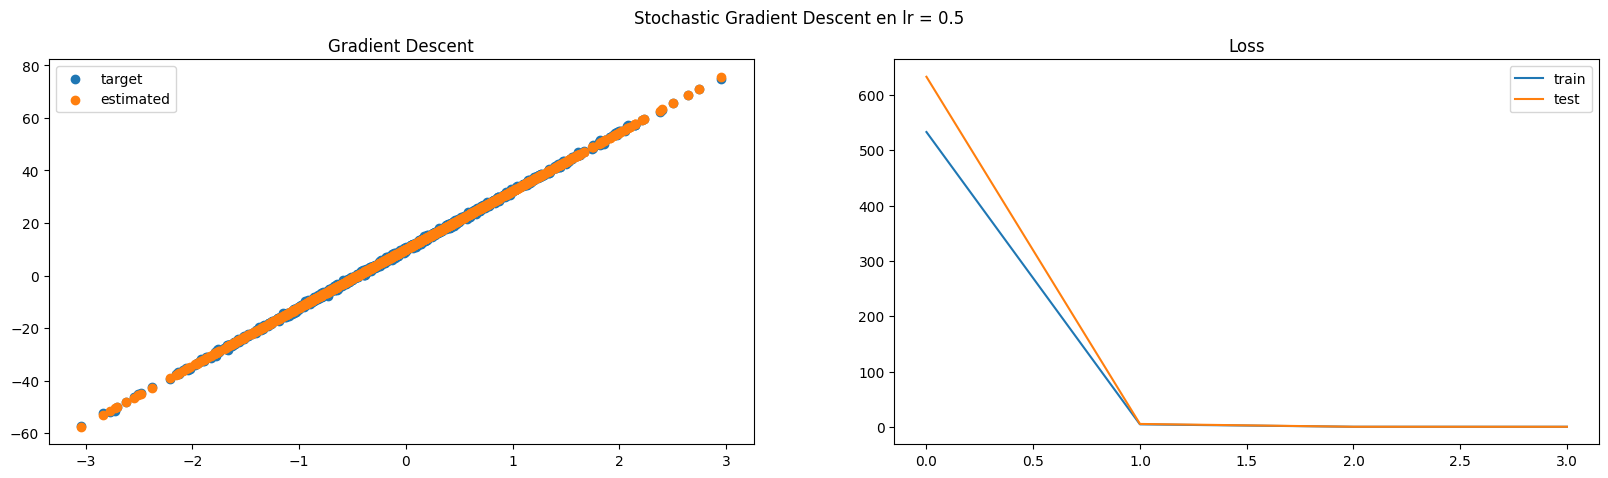

In [65]:
for i in lr:
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    axs = axs.flatten()
    coef, rmse, rmse_test, history = gradientDescent(
        x, y, None, i, 500, 1)
    axs[0].scatter(data['x0'], data['target'], label='target')
    axs[0].scatter(data['x0'], x @ coef, label='estimated')
    axs[0].set_title('Gradient Descent')
    axs[0].legend()
    axs[1].plot(range(len(rmse)), rmse, label='train')
    axs[1].plot(range(len(rmse_test)), rmse_test, label='test')
    axs[1].set_title('Loss')
    axs[1].legend()
    fig.suptitle('Stochastic Gradient Descent en lr = ' + str(i))


Mientras que el GD es monotonamente decreciente, el SGD no lo es. El aumentar el lr hace que los movimientos sean de mas amplitud, eso incluye el efecto ruido del SGD.

Text(0.5, 0.98, 'Stochastic Gradient Descent en lr = 0.5')

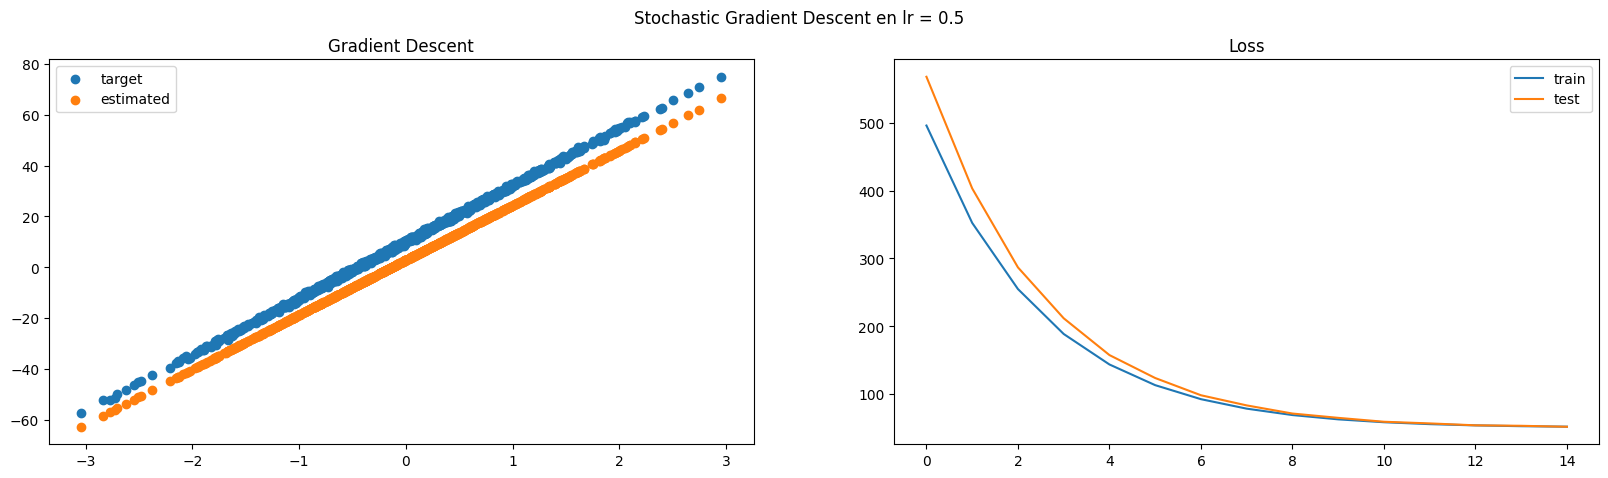

In [66]:
# Por ultimo, si el lr es muy alto, podria nunca converger. Para ambos metodos

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs = axs.flatten()
coef, rmse, rmse_test, history = gradientDescent(
    x, y, None, 1, 50, 1)
axs[0].scatter(data['x0'], data['target'], label='target')
axs[0].scatter(data['x0'], x @ coef, label='estimated')
axs[0].set_title('Gradient Descent')
axs[0].legend()
axs[1].plot(range(len(rmse)), rmse, label='train')
axs[1].plot(range(len(rmse_test)), rmse_test, label='test')
axs[1].set_title('Loss')
axs[1].legend()
fig.suptitle('Stochastic Gradient Descent en lr = ' + str(i))


### Ejercicio 7

En este ejercicio vamos a considerar la regresión logística como un problema de clasificación binaria. La implementación de la misma podemos considerar la siguiente:



In [67]:
class LogisticRegressionSGD():
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, random_state=42):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.loss = None
        self.loss_history = None
        self.grad_history = None
        self.theta_history = None

    def fit(self, X, y):
        """
        Fit the model according to the given training data.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        self : LogisticRegressionSGD
            The fitted model.
        """
        np.random.seed(self.random_state)
        self.weights = np.random.normal(size=X.shape[1])
        self.loss_history = []
        self.grad_history = []
        self.theta_history = []

        self.SGD(X, y)

        return self

    def _step(self, X, y):
        """
        Perform a single gradient step.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        loss : float
            The value of the loss function for the current value of the weights.

        grad : numpy.ndarray
            The gradient of the loss function for the current value of the weights.
        """
        N = len(y)
        y_hat = self.logit(X)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        grad = (-1 / N) * X.T.dot(y - y_hat)

        return loss, grad

    def SGD(self, X, y):
        """
        Perform the stochastic gradient descent optimization algorithm.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).
        """
        for _ in range(self.max_iter):
            loss, grad = self._step(X, y)
            self.weights -= self.lr * grad
            self.loss_history.append(loss)
            self.grad_history.append(grad)
            self.theta_history.append(self.weights.copy())

            # Criterio de parada
            if len(self.loss_history) > 1:
                if np.abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                    break

        return self

    def logit(self, X):
        """
        Calculate the logit of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        logit : numpy.ndarray
            The logit of the observations. An array of shape (n_samples,).
        """
        return 1 / (1 + np.exp(-X.dot(self.weights)))

    def predict_proba(self, X):
        """
        Predict the probability of each class for a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        proba : numpy.ndarray
            The predicted probability of each class. An array of shape (n_samples,).
        """
        return self.logit(X)

    def predict(self, X):
        """
        Predict the class of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        y_pred : numpy.ndarray
            The predicted class. An array of shape (n_samples,).
        """
        return (self.predict_proba(X) >= 0.5).astype(int)

    def score(self, X, y):
        """
        Calculate the accuracy of the model.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        score : float
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)


Con esta clase, vamos a tomar el dataset de breast cancer y vamos a realizar una clasificación binaria. La idea de este ejercicio es que puedan jugar con la manera de obtener los hiperparámetros óptimos para el modelo.

Para ello van a tener que completar el método SGD de la clase LogisticRegressionSGD y luego realizar una búsqueda de grilla para encontrar los mejores hiperparámetros.

In [68]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(len(X))
print(len(X_train))
pd.DataFrame(X)

569
455


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [69]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

model = LogisticRegressionSGD(
    lr=0.01, max_iter=1000, tol=1e-3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [70]:
model.fit(X_train, y_train)
print(X_train.shape)
print(y_train.shape)
print(model.score(X_test,y_test))

(455, 30)
(455,)
0.9473684210526315


In [71]:
model.weights


array([-2.73263702e-01, -3.29262543e-01, -9.90496774e-02,  8.27361205e-01,
       -2.05952506e-01, -3.18902177e-01,  1.32788045e+00,  2.59013092e-01,
       -2.85050289e-01,  1.14054290e+00, -6.45187444e-01,  2.11567744e-03,
        8.73487924e-02, -2.18431812e+00, -1.03862754e+00, -1.41724399e-01,
       -6.68516865e-01,  4.69171149e-01, -3.65653633e-01, -7.72628202e-01,
        7.16435521e-01, -4.84929040e-01, -6.50784349e-01, -2.08219991e+00,
       -5.76630014e-01, -6.71618032e-02, -1.40540192e+00, -1.70652196e-01,
       -7.29306162e-01, -9.25389701e-02])

In [72]:
#Realizemos el gridsearch para este modelo en particular
FEATURES = 30
N_OF_FOLDS = 5
lrs = np.linspace(0.005, 0.05, 20)
max_iters = np.linspace(500,1500,10)
tols = np.linspace(1e-3,1e-1,10)

combinations = np.array(np.meshgrid(lrs, max_iters,tols)).T.reshape(-1, 3) 
#Split: source https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(len(a), n)
    return list(a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))
# Existen metodos para generar los kfolds, en este caso simplemente hago un split de los datos, sin mirar mucho mas.
K_folds = split(X_train,N_OF_FOLDS)
K_folds_y = split(y_train,N_OF_FOLDS)
results = []
for combination in combinations:
    model = LogisticRegressionSGD(lr=combination[0], max_iter=int(combination[1]), tol=combination[2], random_state=42)
    for index, fold in enumerate(K_folds):
        copy = K_folds.copy()
        copy_y = K_folds_y.copy()
        test = copy.pop(index)
        test_y = copy_y.pop(index)
        model.fit(np.array(copy).reshape(-1,FEATURES),np.array(copy_y).reshape(-1))
        results.append([combination[0],int(combination[1]),combination[2],model.score(test,test_y)])


In [73]:
df = pd.DataFrame(np.array(results),
                   columns=['LearningRate', 'MaxIters', 'Tol','Score'])
df

,LearningRate,MaxIters,Tol,Score
0,0.005,500.0,0.001,0.813187
1,0.005,500.0,0.001,0.912088
2,0.005,500.0,0.001,0.813187
3,0.005,500.0,0.001,0.879121
4,0.005,500.0,0.001,0.846154
...,...,...,...,...
9995,0.050,1500.0,0.100,0.549451
9996,0.050,1500.0,0.100,0.615385
9997,0.050,1500.0,0.100,0.395604
9998,0.050,1500.0,0.100,0.626374


In [74]:
groupByModel = df.groupby(['LearningRate', 'MaxIters', 'Tol']).mean()
groupByModel

Score
LearningRate MaxIters Tol            
0.005        500.0    0.001  0.852747
                      0.012  0.492308
                      0.023  0.457143
                      0.034  0.457143
                      0.045  0.457143
...                               ...
0.050        1500.0   0.056  0.652747
                      0.067  0.635165
                      0.078  0.606593
                      0.089  0.586813
                      0.100  0.569231

[2000 rows x 1 columns]

In [75]:
print(groupByModel.idxmax())
print(groupByModel.max())

Score    (0.04763157894736842, 500.0, 0.001)
dtype: object
Score    0.949451
dtype: float64


In [76]:
model = LogisticRegressionSGD(
    lr=0.04763157894736842, max_iter=500, tol=0.001, random_state=42)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9824561403508771


Es importante tener en cuenta de que es muy facil overfittear usando el metodo de gridSearch. Si expandimos mucho la busqueda, facilmente podemos empezar a memorizar el dataset. Generando un score muy alto promedio en los kfolds, pero muy bajo sobre los datos de test.